<a href="https://colab.research.google.com/github/metsumesquita/master_degree_UPE/blob/main/forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#pip install

In [3]:
!pip install calplot

In [4]:
! pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.9 MB/s eta 0:00:00


#importar

In [5]:

import pandas as pd
import numpy as np
import keras as ks
import itertools
import numpy as np
import seaborn as sns

In [6]:
import xlrd
import requests
import json
import calplot

In [7]:
#produto garteziano
from itertools import product
#loop thing
from tqdm.notebook import tqdm
from pmdarima.arima import auto_arima
from matplotlib import pyplot as plt

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller

In [10]:

from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam, SGD

from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

#inicio

In [11]:
# URL to the JSON data
url = 'https://ws.jakarta.go.id/gateway/DataPortalSatuDataJakarta/1.0/satudata?kategori=dataset&tipe=detail&url=indeks-standar-pencemaran-udara-ispu-tahun-2017'

# Send a GET request to fetch the raw JSON data
response = requests.get(url)

# Check the response status code
if response.status_code == 200:
    # Parse the JSON data
    data_json = response.json()

    # Now you can work with the data
    # For example, to print the entire JSON data:
    print(data_json)
else:
    print("Error fetching data:", response.status_code)

{'data': [{'periode_data': '201701', 'tanggal': '2017-01-27', 'stasiun': 'DKI5 (Kebon Jeruk)', 'pm10': '5', 'so2': '11', 'co': '29', 'o3': '37', 'no2': '14', 'max': '37', 'critical': 'O3', 'categori': 'BAIK'}, {'periode_data': '201701', 'tanggal': '2017-01-28', 'stasiun': 'DKI5 (Kebon Jeruk)', 'pm10': '5', 'so2': '11', 'co': '28', 'o3': '42', 'no2': '6', 'max': '42', 'critical': 'O3', 'categori': 'BAIK'}, {'periode_data': '201701', 'tanggal': '2017-01-29', 'stasiun': 'DKI5 (Kebon Jeruk)', 'pm10': '6', 'so2': '11', 'co': '29', 'o3': '26', 'no2': '13', 'max': '29', 'critical': 'CO', 'categori': 'BAIK'}, {'periode_data': '201701', 'tanggal': '2017-01-30', 'stasiun': 'DKI5 (Kebon Jeruk)', 'pm10': '7', 'so2': '11', 'co': '28', 'o3': '41', 'no2': '5', 'max': '41', 'critical': 'O3', 'categori': 'BAIK'}, {'periode_data': '201701', 'tanggal': '2017-01-31', 'stasiun': 'DKI5 (Kebon Jeruk)', 'pm10': '6', 'so2': '11', 'co': '26', 'o3': '42', 'no2': '7', 'max': '42', 'critical': 'O3', 'categori': 'B

In [12]:
#passando para o df
df = pd.DataFrame(data_json['data'])

In [13]:
df.columns

Index(['periode_data', 'tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2',
       'max', 'critical', 'categori'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   periode_data  1825 non-null   object
 1   tanggal       1825 non-null   object
 2   stasiun       1825 non-null   object
 3   pm10          1825 non-null   object
 4   so2           1825 non-null   object
 5   co            1825 non-null   object
 6   o3            1825 non-null   object
 7   no2           1825 non-null   object
 8   max           1825 non-null   object
 9   critical      1800 non-null   object
 10  categori      1825 non-null   object
dtypes: object(11)
memory usage: 157.0+ KB


In [15]:
df.describe()
#365 days - 1 year -TAGGAL needs to change type

periode_data     tanggal             stasiun  pm10   so2  ...    o3   no2   max critical categori
count          1825        1825                1825  1825  1825  ...  1825  1825  1825     1800     1825
unique           12         365                   5   102    54  ...   149    31   143        6        4
top          201701  2017-01-27  DKI5 (Kebon Jeruk)   ---    18  ...   ---     5    53       O3   SEDANG
freq            155           5                 365   115   115  ...    87   173    52     1152     1121

[4 rows x 11 columns]

In [16]:
#selecionadoas colunas numericas e de data e local.
df = df[['tanggal','stasiun', 'pm10', 'so2', 'co','o3','no2']]
print(df.tail)

<bound method NDFrame.tail of          tanggal             stasiun pm10 so2  co  o3 no2
0     2017-01-27  DKI5 (Kebon Jeruk)    5  11  29  37  14
1     2017-01-28  DKI5 (Kebon Jeruk)    5  11  28  42   6
2     2017-01-29  DKI5 (Kebon Jeruk)    6  11  29  26  13
3     2017-01-30  DKI5 (Kebon Jeruk)    7  11  28  41   5
4     2017-01-31  DKI5 (Kebon Jeruk)    6  11  26  42   7
...          ...                 ...  ...  ..  ..  ..  ..
1820  2017-12-27  DKI5 (Kebon Jeruk)   21  21  26  30   4
1821  2017-12-28  DKI5 (Kebon Jeruk)   29  23  26  46   5
1822  2017-12-29  DKI5 (Kebon Jeruk)   55  28  38  47  10
1823  2017-12-30  DKI5 (Kebon Jeruk)   51  26  31  49   8
1824  2017-12-31  DKI5 (Kebon Jeruk)   52  23  40  33   8

[1825 rows x 7 columns]>


In [17]:
#encontrando os dados ausentes
df = df.replace('---',None)

In [18]:
#corrigindo o tipo dos dados
df[['pm10', 'so2', 'co','o3','no2']] = df[['pm10', 'so2', 'co','o3','no2']].apply(pd.to_numeric)

In [19]:
#renomenclatura das colunas
df.rename(columns={'stasiun':'Region','tanggal':'Date','pm10':'PM10','so2':'SO2','co':'CO','o3':'O3','no2':'NO2'}, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1825 non-null   object 
 1   Region  1825 non-null   object 
 2   PM10    1710 non-null   float64
 3   SO2     1746 non-null   float64
 4   CO      1730 non-null   float64
 5   O3      1738 non-null   float64
 6   NO2     1739 non-null   float64
dtypes: float64(5), object(2)
memory usage: 99.9+ KB


In [21]:
df.head()

Date              Region  PM10   SO2    CO    O3   NO2
0  2017-01-27  DKI5 (Kebon Jeruk)   5.0  11.0  29.0  37.0  14.0
1  2017-01-28  DKI5 (Kebon Jeruk)   5.0  11.0  28.0  42.0   6.0
2  2017-01-29  DKI5 (Kebon Jeruk)   6.0  11.0  29.0  26.0  13.0
3  2017-01-30  DKI5 (Kebon Jeruk)   7.0  11.0  28.0  41.0   5.0
4  2017-01-31  DKI5 (Kebon Jeruk)   6.0  11.0  26.0  42.0   7.0

In [22]:
df[20:50]

Date                Region  PM10   SO2    CO    O3   NO2
20  2017-02-16    DKI1 (Bunderan HI)  36.0   7.0  19.0  38.0   3.0
21  2017-02-17    DKI1 (Bunderan HI)  52.0   4.0  30.0  33.0   4.0
22  2017-02-18    DKI1 (Bunderan HI)  68.0   7.0  25.0  30.0   4.0
23  2017-02-19    DKI1 (Bunderan HI)  57.0   4.0  34.0  25.0   2.0
24  2017-02-20    DKI1 (Bunderan HI)  40.0   3.0  31.0  24.0   3.0
25  2017-02-21    DKI1 (Bunderan HI)  51.0   3.0  34.0  46.0   4.0
26  2017-02-22    DKI1 (Bunderan HI)  58.0  15.0  25.0  78.0   5.0
27  2017-02-23    DKI1 (Bunderan HI)  52.0   7.0  27.0  71.0   7.0
28  2017-02-24    DKI1 (Bunderan HI)  62.0   7.0  30.0  67.0   5.0
29  2017-02-25    DKI1 (Bunderan HI)  50.0   6.0  24.0  68.0   3.0
30  2017-02-26    DKI1 (Bunderan HI)  44.0   8.0  25.0  60.0   4.0
31  2017-02-27    DKI1 (Bunderan HI)  30.0   6.0  23.0  44.0   4.0
32  2017-02-28    DKI1 (Bunderan HI)  58.0   6.0  26.0  54.0   4.0
33  2017-02-01  DKI2 (Kelapa Gading)  27.0  21.0  13.0  36.0  12.0
34  2017-02-02  DKI2 (Kelapa Gading)  37.0  22.0  18.0  36.0  16.0
35  2017-02-03  DKI2 (Kelapa Gading)  37.0  21.0  19.0  45.0  13.0
36  2017-02-04  DKI2 (Kelapa Gading)  20.0  20.0   9.0  38.0   7.0
37  2017-02-05  DKI2 (Kelapa Gading)  21.0  18.0   5.0  37.0   5.0
38  2017-02-06  DKI2 (Kelapa Gading)  22.0  18.0   6.0  34.0   7.0
39  2017-02-07  DKI2 (Kelapa Gading)  25.0  19.0   6.0  33.0   8.0
40  2017-02-08  DKI2 (Kelapa Gading)  25.0  19.0   NaN  28.0  12.0
41  2017-02-09  DKI2 (Kelapa Gading)  35.0  18.0  11.0  41.0  14.0
42  2017-02-10  DKI2 (Kelapa Gading)  28.0  17.0  11.0  44.0  12.0
43  2017-02-11  DKI2 (Kelapa Gading)  30.0  18.0  14.0  43.0  11.0
44  2017-02-12  DKI2 (Kelapa Gading)  25.0  16.0   5.0  44.0  12.0
45  2017-02-13  DKI2 (Kelapa Gading)  33.0  18.0  11.0  53.0  12.0
46  2017-02-14  DKI2 (Kelapa Gading)  37.0  18.0  17.0  47.0  14.0
47  2017-02-15  DKI2 (Kelapa Gading)  21.0  18.0  10.0  46.0  12.0
48  2017-02-16  DKI2 (Kelapa Gading)  22.0  18.0  11.0  46.0  11.0
49  2017-02-17  DKI2 (Kelapa Gading)  29.0  21.0  18.0  50.0  15.0

In [23]:
#separação feita de uma area especifica devido ao tempo e tentanto fazer como no artigo
dk1_data = df[df['Region'] =='DKI1 (Bunderan HI)']

In [24]:
# Remover a coluna 'Region' da cópia
dk1_data =dk1_data.drop('Region', axis=1)

In [25]:
#mudança no formato da data
dk1_data['Date'] = pd.to_datetime(dk1_data['Date'], format='%Y-%m-%d')

In [26]:
# Verificando e removendo duplicatas
dk1_data.drop_duplicates(subset='Date', keep='first', inplace=True)

In [27]:
# Remove the hour component using dt.normalize()
#dk1_data['Date'] = dk1_data['Date'].dt.normalize()

In [28]:
#Realiza o cálculo da porcentagem de dados nulos por coluna
dk1_data.isnull().sum()/dk1_data.shape[0]*100

Date    0.000000
PM10    3.561644
SO2     7.397260
CO      3.287671
O3      4.383562
NO2     3.561644
dtype: float64

In [29]:
dk1 =dk1_data  # Assign the modified df to dk1_data directly

In [30]:
#transformação da data normal para um dataindex
dk1 = dk1_data.set_index('Date')

In [31]:
# Retorna True ou False
print(dk1.index.is_monotonic_increasing)

False


In [32]:
# Ordena o DataFrame pelo índice
dk1 = dk1.sort_index()

#coorelação entre variaveis.

In [33]:
# Selecionando as colunas numéricas para calcular a correlação
numerical_data = dk1[['PM10', 'SO2', 'CO', 'O3', 'NO2']]  # Ajuste as colunas conforme seu conjunto de dados

# Calculando a matriz de correlação
correlation_matrix = numerical_data.corr()

print(correlation_matrix)

          PM10       SO2        CO        O3       NO2
PM10  1.000000 -0.170801  0.393927  0.498815  0.546986
SO2  -0.170801  1.000000 -0.293382 -0.023117 -0.074702
CO    0.393927 -0.293382  1.000000  0.085016  0.213388
O3    0.498815 -0.023117  0.085016  1.000000  0.674077
NO2   0.546986 -0.074702  0.213388  0.674077  1.000000


<Axes: >

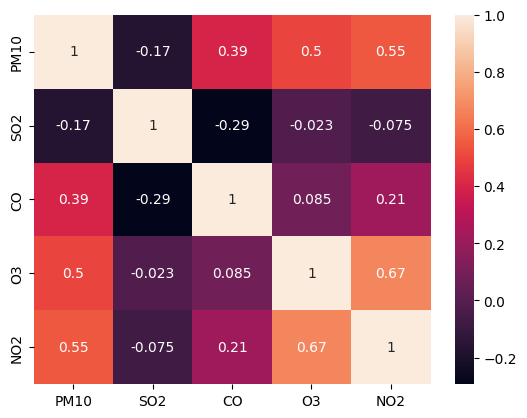

In [34]:
# Plotar a matriz de correlação

sns.heatmap(correlation_matrix, annot=True)
#PM10 e NO2 têm uma correlação moderada (~0.55), indicando que, à medida que uma aumenta, a outra tende a aumentar.
#O3 e NO2 têm uma forte correlação (~0.67).
#PM10 e O3 também estão positivamente correlacionadas (~0.50).

#preenchendo os dados vazios com interpolação

#PM10

###antes de interpolar PM10

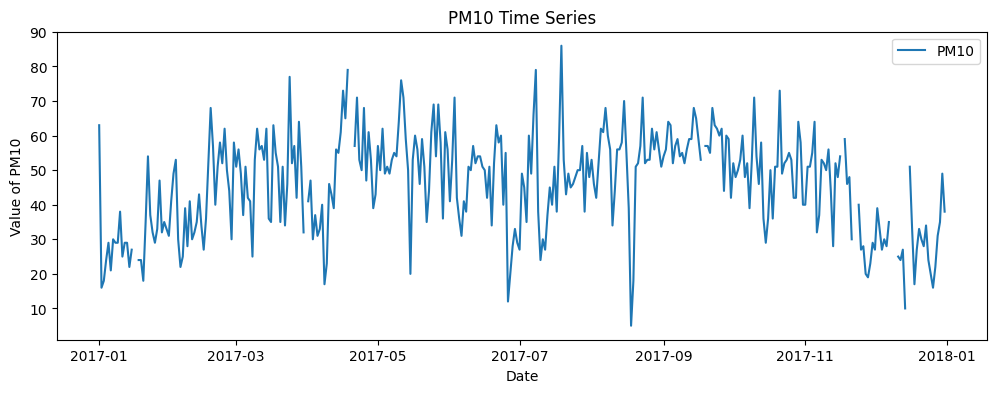

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.plot(dk1.index, dk1['PM10'], label='PM10')
plt.title("PM10 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of PM10")
plt.legend()
plt.show()


##depois de interpolar PM10

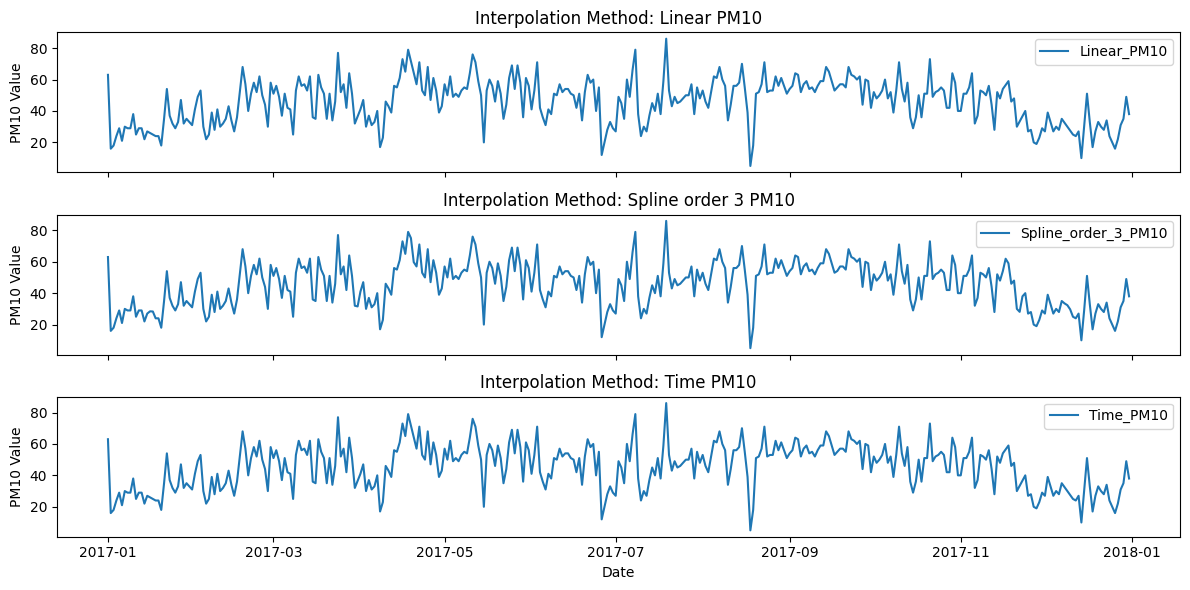

In [ ]:
import matplotlib.pyplot as plt
dk1['Linear_PM10'] = dk1['PM10'].interpolate(method='linear')
dk1['Spline_order_3_PM10'] =dk1['PM10'].interpolate(method='spline', order=3)
dk1['Time_PM10'] = dk1['PM10'].interpolate(method='time')

# Métodos de interpolação
methods = ['Linear_PM10', 'Spline_order_3_PM10', 'Time_PM10']

# Configurando o tamanho da figura
fig, axes = plt.subplots(len(methods), 1, figsize=(12, 6), sharex=True)

# Criando gráficos individuais com títulos para cada método
for i, method in enumerate(methods):
    axes[i].plot(dk1.index, dk1[method], label=method)
    axes[i].set_title(f"Interpolation Method: {method.replace('_', ' ')}")  # Título dinâmico
    axes[i].set_ylabel('PM10 Value')
    axes[i].legend()

# Configurando o eixo X para todos os gráficos
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

##Analisando performance dos modelos utilizados INTER PM10

Linear Interpolation - MAE: 1.4397260273972603, RMSE: 8.14655056752015
Spline Interpolation - MAE: 1.4524652491420655, RMSE: 8.229584411821838
Time Interpolation - MAE: 1.4397260273972603, RMSE: 8.14655056752015
------------visualization------------


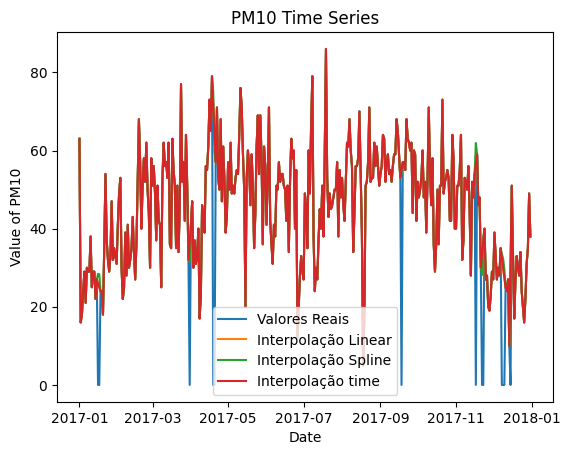

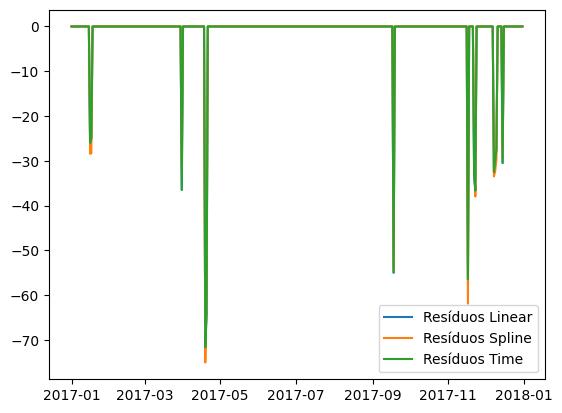

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Real values (garantindo que não contenham NaNs para as métricas)
real_values = dk1['PM10'].fillna(0)  # Remove valores ausentes

# Interpolated values (alinhando índices)
interpolated_values_linear = dk1.loc[real_values.index, 'Linear_PM10']
interpolated_values_spline = dk1.loc[real_values.index, 'Spline_order_3_PM10']

interpolated_values_time = dk1.loc[real_values.index, 'Time_PM10']

# Garantindo que as Séries estejam alinhadas e sem NaN
assert real_values.shape == interpolated_values_linear.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_spline.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_time.shape,  "As dimensões não coincidem!"
# MAE
mae_linear = mean_absolute_error(real_values, interpolated_values_linear)
mae_spline = mean_absolute_error(real_values, interpolated_values_spline)
mae_time = mean_absolute_error(real_values, interpolated_values_time)
# RMSE
rmse_linear = np.sqrt(mean_squared_error(real_values, interpolated_values_linear))
rmse_spline = np.sqrt(mean_squared_error(real_values, interpolated_values_spline))
rmse_time = np.sqrt(mean_squared_error(real_values, interpolated_values_time))

print(f"Linear Interpolation - MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Spline Interpolation - MAE: {mae_spline}, RMSE: {rmse_spline}")
print(f"Time Interpolation - MAE: {mae_time}, RMSE: {rmse_time}")


print("------------visualization------------")
import matplotlib.pyplot as plt


# Plotar os resultados

# Plotar os resultados
plt.title("PM10 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of PM10")
plt.plot(real_values.index, real_values, label='Valores Reais')
plt.plot(real_values.index, interpolated_values_linear, label='Interpolação Linear')
plt.plot(real_values.index, interpolated_values_spline, label='Interpolação Spline')

plt.plot(real_values.index, interpolated_values_time, label='Interpolação time')
plt.legend()
plt.show()

# Plotar os resíduos (opcional)
plt.plot(real_values.index, real_values - interpolated_values_linear, label='Resíduos Linear')
plt.plot(real_values.index, real_values - interpolated_values_spline, label='Resíduos Spline')

plt.plot(real_values.index, real_values - interpolated_values_time, label='Resíduos Time')

plt.legend()
plt.show()



#SO2

##antes de interpolar SO2

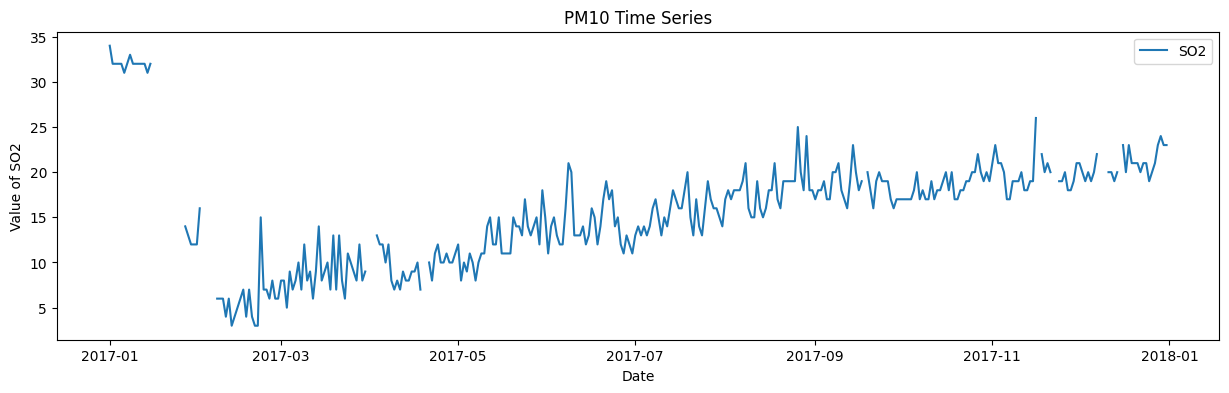

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(dk1.index, dk1['SO2'], label='SO2')
plt.title("PM10 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of SO2")
plt.legend()
plt.show()


##depois de interpolar SO2

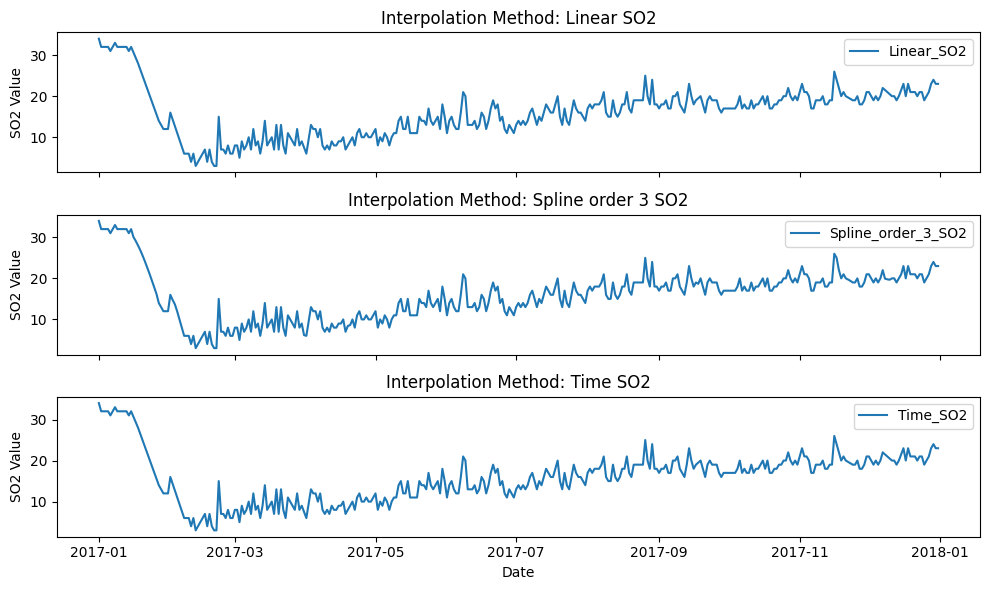

In [ ]:
import matplotlib.pyplot as plt
dk1['Linear_SO2'] = dk1['SO2'].interpolate(method='linear')
dk1['Spline_order_3_SO2'] =dk1['SO2'].interpolate(method='spline', order=3)
dk1['Time_SO2'] = dk1['SO2'].interpolate(method='time')

# Métodos de interpolação
methods = ['Linear_SO2', 'Spline_order_3_SO2', 'Time_SO2']

# Configurando o tamanho da figura
fig, axes = plt.subplots(len(methods), 1, figsize=(10, 6), sharex=True)

# Criando gráficos individuais com títulos para cada método
for i, method in enumerate(methods):
    axes[i].plot(dk1.index, dk1[method], label=method)
    axes[i].set_title(f"Interpolation Method: {method.replace('_', ' ')}")  # Título dinâmico
    axes[i].set_ylabel('SO2 Value')
    axes[i].legend()

# Configurando o eixo X para todos os gráficos
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

##analise metrica performance SO2

Linear Interpolation - MAE: 1.326027397260274, RMSE: 5.196772405034792
Spline Interpolation - MAE: 1.333824859600633, RMSE: 5.2219566433456945
Spline Interpolation - MAE: 1.326027397260274, RMSE: 5.196772405034792
------------visualization------------


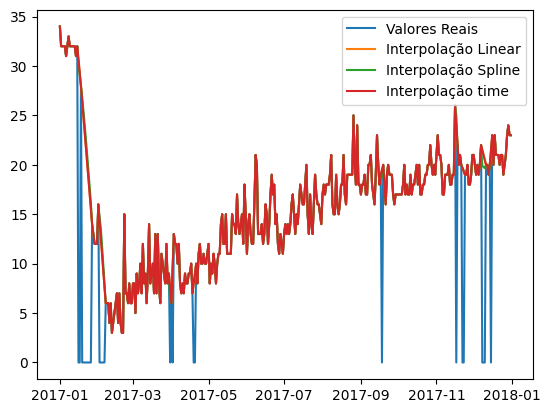

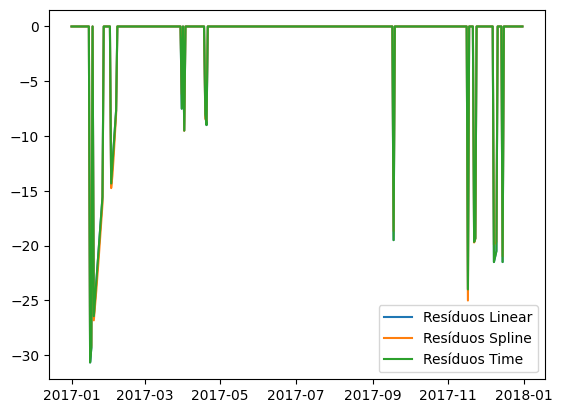

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Real values (garantindo que não contenham NaNs para as métricas)
real_values = dk1['SO2'].fillna(0)  # Remove valores ausentes

# Interpolated values (alinhando índices)
interpolated_values_linear = dk1.loc[real_values.index, 'Linear_SO2']
interpolated_values_spline = dk1.loc[real_values.index, 'Spline_order_3_SO2']

interpolated_values_time = dk1.loc[real_values.index, 'Time_SO2']

# Garantindo que as Séries estejam alinhadas e sem NaN
assert real_values.shape == interpolated_values_linear.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_spline.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_time.shape,  "As dimensões não coincidem!"
# MAE
mae_linear = mean_absolute_error(real_values, interpolated_values_linear)
mae_spline = mean_absolute_error(real_values, interpolated_values_spline)
mae_time = mean_absolute_error(real_values, interpolated_values_time)
# RMSE
rmse_linear = np.sqrt(mean_squared_error(real_values, interpolated_values_linear))
rmse_spline = np.sqrt(mean_squared_error(real_values, interpolated_values_spline))
rmse_time = np.sqrt(mean_squared_error(real_values, interpolated_values_time))

print(f"Linear Interpolation - MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Spline Interpolation - MAE: {mae_spline}, RMSE: {rmse_spline}")
print(f"Spline Interpolation - MAE: {mae_time}, RMSE: {rmse_time}")

print("------------visualization------------")
import matplotlib.pyplot as plt


# Plotar os resultados
plt.plot(real_values.index, real_values, label='Valores Reais')
plt.plot(real_values.index, interpolated_values_linear, label='Interpolação Linear')
plt.plot(real_values.index, interpolated_values_spline, label='Interpolação Spline')

plt.plot(real_values.index, interpolated_values_time, label='Interpolação time')
plt.legend()
plt.show()

# Plotar os resíduos (opcional)
plt.plot(real_values.index, real_values - interpolated_values_linear, label='Resíduos Linear')
plt.plot(real_values.index, real_values - interpolated_values_spline, label='Resíduos Spline')

plt.plot(real_values.index, real_values - interpolated_values_time, label='Resíduos Time')

plt.legend()
plt.show()


##protanto RUIDOS DE CADA INTERPOLAÇAO DA VARIAVEL SO2

Linear Interpolation - MAE: 1.326027397260274, RMSE: 5.196772405034792
Spline Interpolation - MAE: 1.333824859600633, RMSE: 5.2219566433456945
Time Interpolation - MAE: 1.326027397260274, RMSE: 5.196772405034792
------------visualization------------


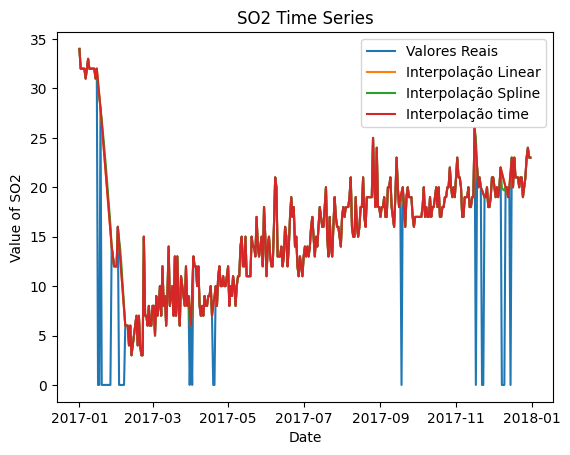

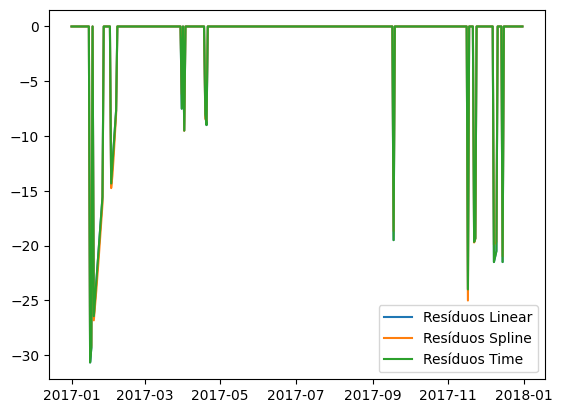

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Real values (garantindo que não contenham NaNs para as métricas)
real_values = dk1['SO2'].fillna(0)  # Remove valores ausentes

# Interpolated values (alinhando índices)
interpolated_values_linear = dk1.loc[real_values.index, 'Linear_SO2']
interpolated_values_spline = dk1.loc[real_values.index, 'Spline_order_3_SO2']
interpolated_values_time = dk1.loc[real_values.index, 'Time_SO2']

# Garantindo que as Séries estejam alinhadas e sem NaN
assert real_values.shape == interpolated_values_linear.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_spline.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_time.shape,  "As dimensões não coincidem!"
# MAE
mae_linear = mean_absolute_error(real_values, interpolated_values_linear)
mae_spline = mean_absolute_error(real_values, interpolated_values_spline)
mae_time = mean_absolute_error(real_values, interpolated_values_time)
# RMSE
rmse_linear = np.sqrt(mean_squared_error(real_values, interpolated_values_linear))
rmse_spline = np.sqrt(mean_squared_error(real_values, interpolated_values_spline))
rmse_time = np.sqrt(mean_squared_error(real_values, interpolated_values_time))

print(f"Linear Interpolation - MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Spline Interpolation - MAE: {mae_spline}, RMSE: {rmse_spline}")
print(f"Time Interpolation - MAE: {mae_time}, RMSE: {rmse_time}")

print("------------visualization------------")
import matplotlib.pyplot as plt


# Plotar os resultados

# Plotar os resultados
plt.title("SO2 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of SO2")
plt.plot(real_values.index, real_values, label='Valores Reais')
plt.plot(real_values.index, interpolated_values_linear, label='Interpolação Linear')
plt.plot(real_values.index, interpolated_values_spline, label='Interpolação Spline')

plt.plot(real_values.index, interpolated_values_time, label='Interpolação time')
plt.legend()
plt.show()

# Plotar os resíduos (opcional)
plt.plot(real_values.index, real_values - interpolated_values_linear, label='Resíduos Linear')
plt.plot(real_values.index, real_values - interpolated_values_spline, label='Resíduos Spline')

plt.plot(real_values.index, real_values - interpolated_values_time, label='Resíduos Time')

plt.legend()
plt.show()


#CO

##antes de interpolar

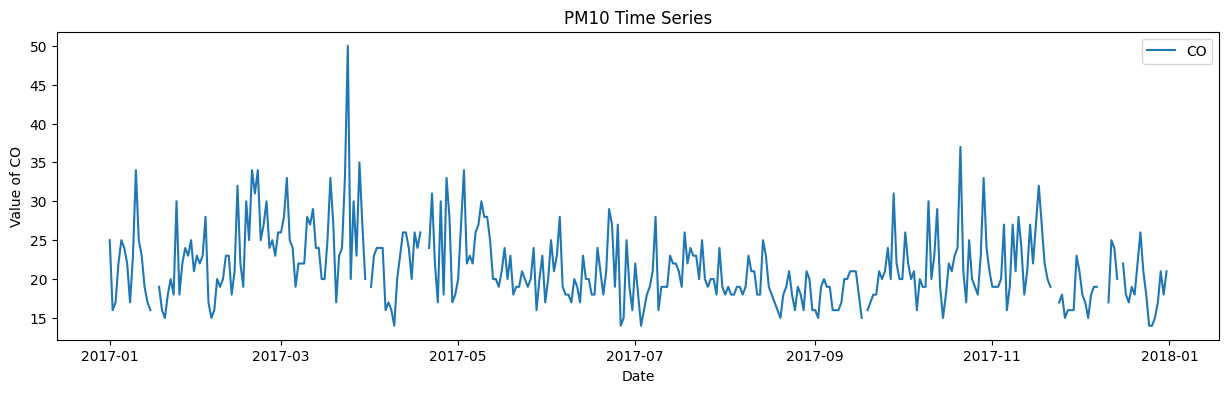

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(dk1.index, dk1['CO'], label='CO')
plt.title("PM10 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of CO")
plt.legend()
plt.show()

##depois de interpolar CO

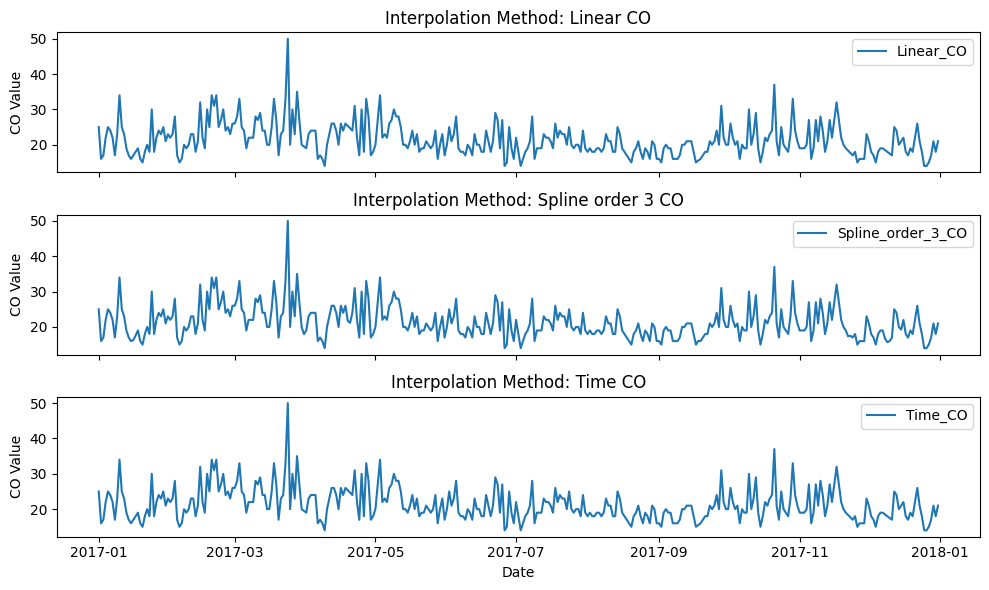

In [36]:
import matplotlib.pyplot as plt
dk1['Linear_CO'] = dk1['CO'].interpolate(method='linear')
dk1['Spline_order_3_CO'] =dk1['CO'].interpolate(method='spline', order=3)
dk1['Time_CO'] = dk1['CO'].interpolate(method='time')

# Métodos de interpolação
methods = ['Linear_CO', 'Spline_order_3_CO', 'Time_CO']

# Configurando o tamanho da figura
fig, axes = plt.subplots(len(methods), 1, figsize=(10, 6), sharex=True)

# Criando gráficos individuais com títulos para cada método
for i, method in enumerate(methods):
    axes[i].plot(dk1.index, dk1[method], label=method)
    axes[i].set_title(f"Interpolation Method: {method.replace('_', ' ')}")  # Título dinâmico
    axes[i].set_ylabel('CO Value')
    axes[i].legend()

# Configurando o eixo X para todos os gráficos
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

##ANALISE PERFORMANCE CO inter metdo

Linear Interpolation - MAE: 0.6328767123287671, RMSE: 3.5289194451747865
Spline Interpolation - MAE: 0.5844335129406939, RMSE: 3.2415455433249094
Time Interpolation - MAE: 0.6328767123287671, RMSE: 3.5289194451747865
------------visualization------------


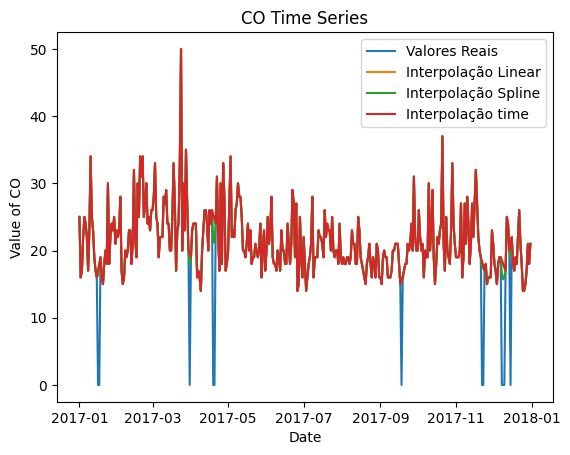

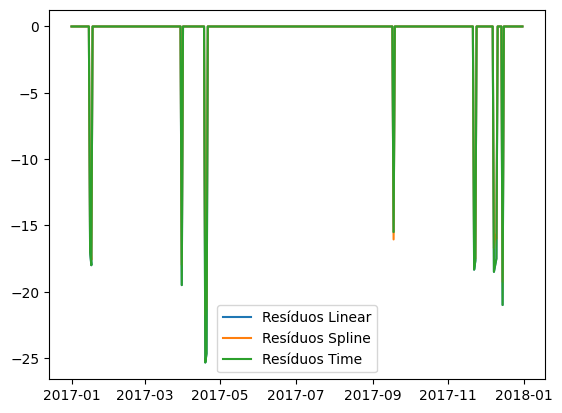

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Real values (garantindo que não contenham NaNs para as métricas)
real_values = dk1['CO'].fillna(0)  # Remove valores ausentes

# Interpolated values (alinhando índices)
interpolated_values_linear = dk1.loc[real_values.index, 'Linear_CO']
interpolated_values_spline = dk1.loc[real_values.index, 'Spline_order_3_CO']

interpolated_values_time = dk1.loc[real_values.index, 'Time_CO']

# Garantindo que as Séries estejam alinhadas e sem NaN
assert real_values.shape == interpolated_values_linear.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_spline.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_time.shape,  "As dimensões não coincidem!"
# MAE
mae_linear = mean_absolute_error(real_values, interpolated_values_linear)
mae_spline = mean_absolute_error(real_values, interpolated_values_spline)
mae_time = mean_absolute_error(real_values, interpolated_values_time)
# RMSE
rmse_linear = np.sqrt(mean_squared_error(real_values, interpolated_values_linear))
rmse_spline = np.sqrt(mean_squared_error(real_values, interpolated_values_spline))
rmse_time = np.sqrt(mean_squared_error(real_values, interpolated_values_time))

print(f"Linear Interpolation - MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Spline Interpolation - MAE: {mae_spline}, RMSE: {rmse_spline}")
print(f"Time Interpolation - MAE: {mae_time}, RMSE: {rmse_time}")


print("------------visualization------------")
import matplotlib.pyplot as plt


# Plotar os resultados

# Plotar os resultados
plt.title("CO Time Series")
plt.xlabel("Date")
plt.ylabel("Value of CO")
plt.plot(real_values.index, real_values, label='Valores Reais')
plt.plot(real_values.index, interpolated_values_linear, label='Interpolação Linear')
plt.plot(real_values.index, interpolated_values_spline, label='Interpolação Spline')

plt.plot(real_values.index, interpolated_values_time, label='Interpolação time')
plt.legend()
plt.show()

# Plotar os resíduos (opcional)
plt.plot(real_values.index, real_values - interpolated_values_linear, label='Resíduos Linear')
plt.plot(real_values.index, real_values - interpolated_values_spline, label='Resíduos Spline')

plt.plot(real_values.index, real_values - interpolated_values_time, label='Resíduos Time')

plt.legend()
plt.show()


#O3

##antes de interpolar O3

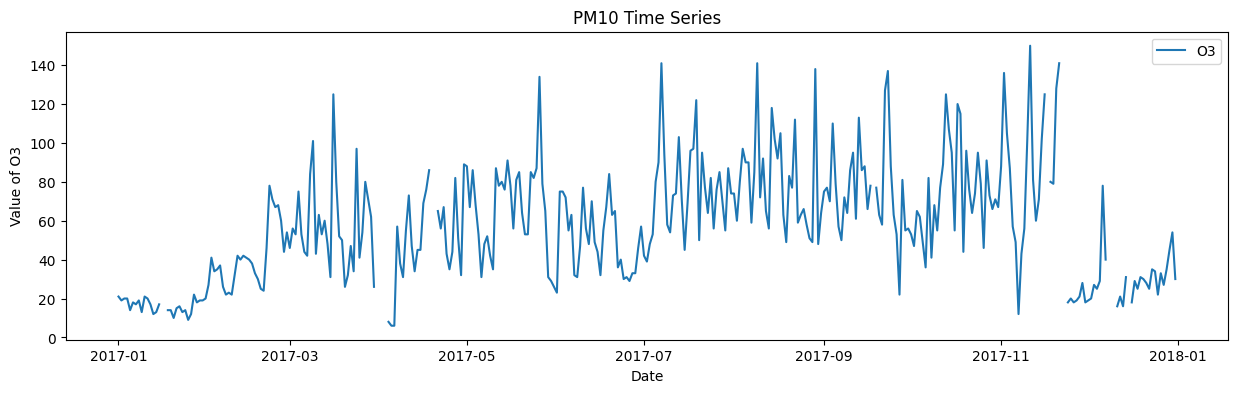

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4 ))
plt.plot(dk1.index, dk1['O3'], label='O3')
plt.title("PM10 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of O3")
plt.legend()
plt.show()


##depois de interpolar

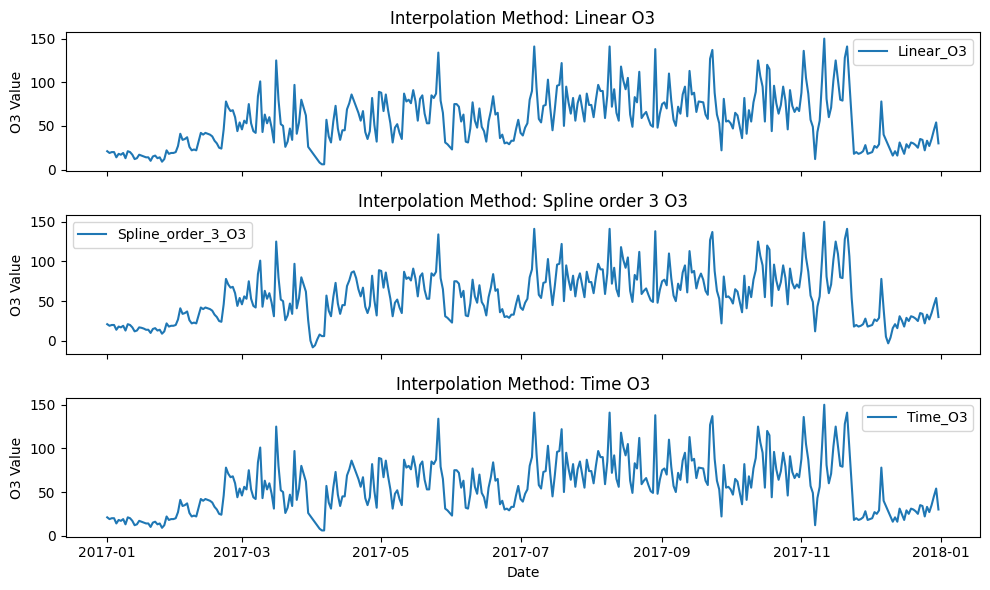

In [ ]:
import matplotlib.pyplot as plt
dk1['Linear_O3'] = dk1['O3'].interpolate(method='linear')
dk1['Spline_order_3_O3'] =dk1['O3'].interpolate(method='spline', order=3)
dk1['Time_O3'] = dk1['O3'].interpolate(method='time')

# Métodos de interpolação
methods = ['Linear_O3', 'Spline_order_3_O3', 'Time_O3']

# Configurando o tamanho da figura
fig, axes = plt.subplots(len(methods), 1, figsize=(10, 6), sharex=True)

# Criando gráficos individuais com títulos para cada método
for i, method in enumerate(methods):
    axes[i].plot(dk1.index, dk1[method], label=method)
    axes[i].set_title(f"Interpolation Method: {method.replace('_', ' ')}")  # Título dinâmico
    axes[i].set_ylabel('O3 Value')
    axes[i].legend()

# Configurando o eixo X para todos os gráficos
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

##METRICA PERFORMANCE 03

Linear Interpolation - MAE: 1.9109589041095891, RMSE: 11.24381717467579
Spline Interpolation - MAE: 1.6629856087834836, RMSE: 11.537775334672025
Time Interpolation - MAE: 1.9109589041095891, RMSE: 11.24381717467579
------------visualization------------


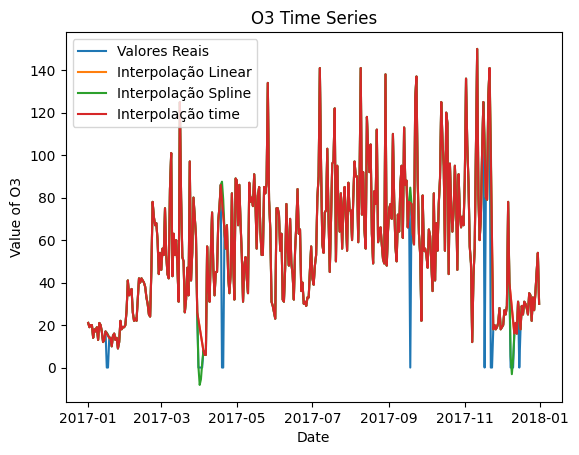

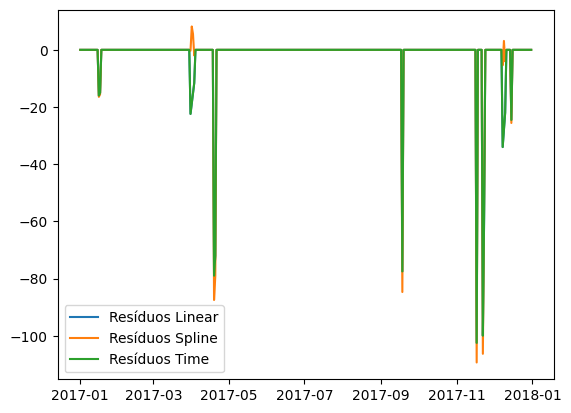

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Real values (garantindo que não contenham NaNs para as métricas)
real_values = dk1['O3'].fillna(0)  # Remove valores ausentes

# Interpolated values (alinhando índices)
interpolated_values_linear = dk1.loc[real_values.index, 'Linear_O3']
interpolated_values_spline = dk1.loc[real_values.index, 'Spline_order_3_O3']
interpolated_values_time = dk1.loc[real_values.index, 'Time_O3']

# Garantindo que as Séries estejam alinhadas e sem NaN
assert real_values.shape == interpolated_values_linear.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_spline.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_time.shape,  "As dimensões não coincidem!"
# MAE
mae_linear = mean_absolute_error(real_values, interpolated_values_linear)
mae_spline = mean_absolute_error(real_values, interpolated_values_spline)
mae_time = mean_absolute_error(real_values, interpolated_values_time)
# RMSE
rmse_linear = np.sqrt(mean_squared_error(real_values, interpolated_values_linear))
rmse_spline = np.sqrt(mean_squared_error(real_values, interpolated_values_spline))
rmse_time = np.sqrt(mean_squared_error(real_values, interpolated_values_time))

print(f"Linear Interpolation - MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Spline Interpolation - MAE: {mae_spline}, RMSE: {rmse_spline}")
print(f"Time Interpolation - MAE: {mae_time}, RMSE: {rmse_time}")

print("------------visualization------------")
import matplotlib.pyplot as plt


# Plotar os resultados
plt.title("O3 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of O3")
plt.plot(real_values.index, real_values, label='Valores Reais')
plt.plot(real_values.index, interpolated_values_linear, label='Interpolação Linear')
plt.plot(real_values.index, interpolated_values_spline, label='Interpolação Spline')

plt.plot(real_values.index, interpolated_values_time, label='Interpolação time')
plt.legend()
plt.show()

# Plotar os resíduos (opcional)
plt.plot(real_values.index, real_values - interpolated_values_linear, label='Resíduos Linear')
plt.plot(real_values.index, real_values - interpolated_values_spline, label='Resíduos Spline')

plt.plot(real_values.index, real_values - interpolated_values_time, label='Resíduos Time')

plt.legend()
plt.show()


#NO2

##antes de interpolar no2

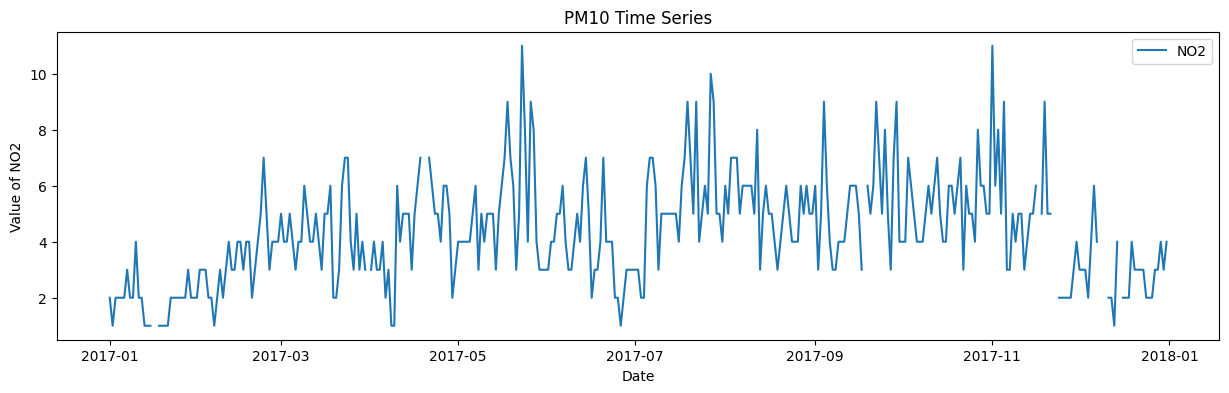

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(dk1.index, dk1['NO2'], label='NO2')
plt.title("PM10 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of NO2")
plt.legend()
plt.show()

##depois de interpolar NO2

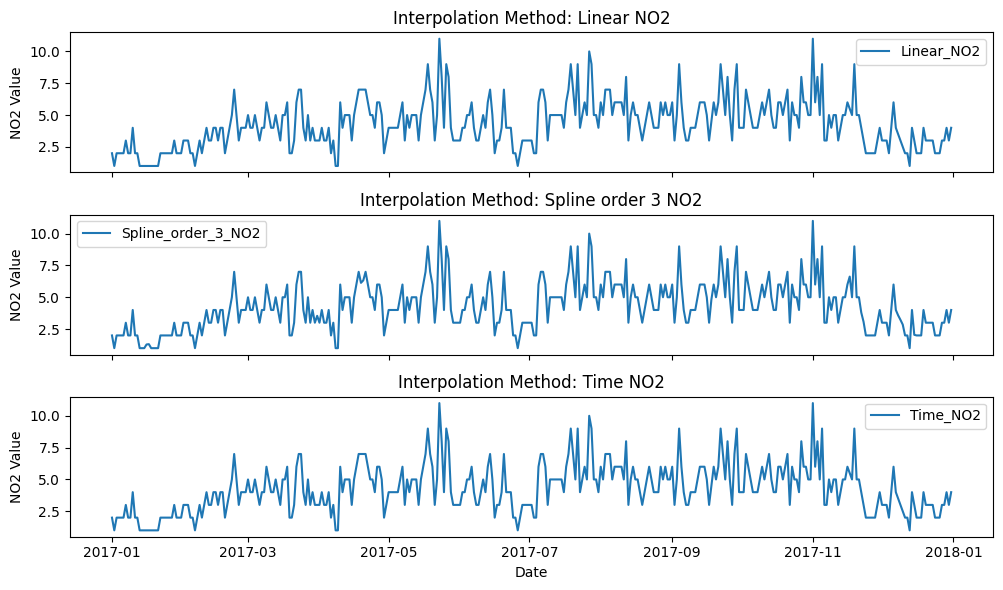

In [ ]:
import matplotlib.pyplot as plt
dk1['Linear_NO2'] = dk1['NO2'].interpolate(method='linear')
dk1['Spline_order_3_NO2'] =dk1['NO2'].interpolate(method='spline', order=3)
dk1['Time_NO2'] = dk1['NO2'].interpolate(method='time')

# Métodos de interpolação
methods = ['Linear_NO2', 'Spline_order_3_NO2', 'Time_NO2']

# Configurando o tamanho da figura
fig, axes = plt.subplots(len(methods), 1, figsize=(10, 6), sharex=True)

# Criando gráficos individuais com títulos para cada método
for i, method in enumerate(methods):
    axes[i].plot(dk1.index, dk1[method], label=method)
    axes[i].set_title(f"Interpolation Method: {method.replace('_', ' ')}")  # Título dinâmico
    axes[i].set_ylabel('NO2 Value')
    axes[i].legend()

# Configurando o eixo X para todos os gráficos
axes[-1].set_xlabel('Date')
plt.tight_layout()
plt.show()

##ANALISE PERFORMANCE NO2

Linear Interpolation - MAE: 0.13150684931506848, RMSE: 0.7781256017217236
Spline Interpolation - MAE: 0.1332314265411833, RMSE: 0.7765917343643145
Time Interpolation - MAE: 0.13150684931506848, RMSE: 0.7781256017217236
------------visualization------------


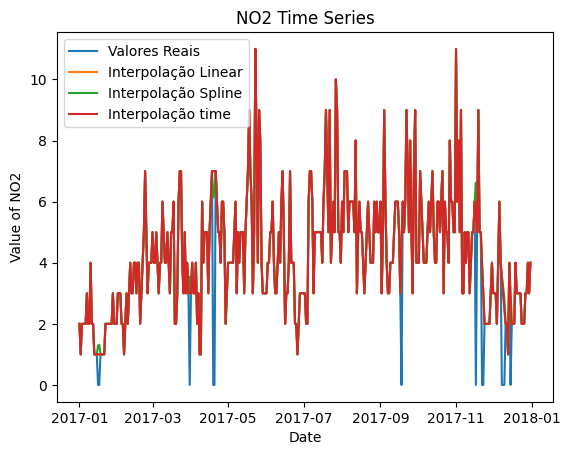

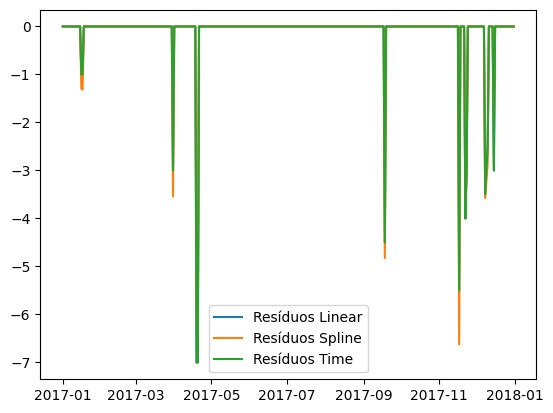

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Real values (garantindo que não contenham NaNs para as métricas)
real_values = dk1['NO2'].fillna(0)  # Remove valores ausentes

# Interpolated values (alinhando índices)
interpolated_values_linear = dk1.loc[real_values.index, 'Linear_NO2']
interpolated_values_spline = dk1.loc[real_values.index, 'Spline_order_3_NO2']

interpolated_values_time = dk1.loc[real_values.index, 'Time_NO2']

# Garantindo que as Séries estejam alinhadas e sem NaN
assert real_values.shape == interpolated_values_linear.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_spline.shape, "As dimensões não coincidem!"
assert real_values.shape == interpolated_values_time.shape,  "As dimensões não coincidem!"
# MAE
mae_linear = mean_absolute_error(real_values, interpolated_values_linear)
mae_spline = mean_absolute_error(real_values, interpolated_values_spline)
mae_time = mean_absolute_error(real_values, interpolated_values_time)
# RMSE
rmse_linear = np.sqrt(mean_squared_error(real_values, interpolated_values_linear))
rmse_spline = np.sqrt(mean_squared_error(real_values, interpolated_values_spline))
rmse_time = np.sqrt(mean_squared_error(real_values, interpolated_values_time))

print(f"Linear Interpolation - MAE: {mae_linear}, RMSE: {rmse_linear}")
print(f"Spline Interpolation - MAE: {mae_spline}, RMSE: {rmse_spline}")
print(f"Time Interpolation - MAE: {mae_time}, RMSE: {rmse_time}")

print("------------visualization------------")
import matplotlib.pyplot as plt



# Plotar os resultados
plt.title("NO2 Time Series")
plt.xlabel("Date")
plt.ylabel("Value of NO2")
plt.plot(real_values.index, real_values, label='Valores Reais')
plt.plot(real_values.index, interpolated_values_linear, label='Interpolação Linear')
plt.plot(real_values.index, interpolated_values_spline, label='Interpolação Spline')

plt.plot(real_values.index, interpolated_values_time, label='Interpolação time')
plt.legend()
plt.show()

# Plotar os resíduos (opcional)
plt.plot(real_values.index, real_values - interpolated_values_linear, label='Resíduos Linear')
plt.plot(real_values.index, real_values - interpolated_values_spline, label='Resíduos Spline')
plt.plot(real_values.index, real_values - interpolated_values_time, label='Resíduos Time')

plt.legend()
plt.show()

#lienar an time NO2

In [ ]:
dk1.columns

In [ ]:
dk1_interpolete= dk1[['Linear_PM10','Spline_order_3_PM10',
       'Time_PM10', 'Linear_NO2', 'Spline_order_3_NO2', 'Time_NO2',
       'Linear_O3', 'Spline_order_3_O3', 'Time_O3', 'Linear_CO',
       'Spline_order_3_CO', 'Time_CO', 'Linear_SO2', 'Spline_order_3_SO2',
       'Time_SO2']]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#DATA INFORMAÇAO  as stationary data (PM10, CO,O3 and NO2) DE ACORDO COM O ARTIGO

Dk1_best_inter= dk1[['Time_PM10','Time_NO2','Spline_order_3_O3','Spline_order_3_CO','Time_SO2']]

#estacionariodariada

In [ ]:

# Função para testar a estacionaridade de cada coluna
def testar_estacionaridade(df):
    resultados = {}
    for coluna in df.columns:
        resultado = adfuller(df[coluna])
        resultados[coluna] = {
            'ADF Statistic': resultado[0],
            'p-value': resultado[1],
            'Lags Used': resultado[2],
            'Number of Observations Used': resultado[3],
            'Critical Value (1%)': resultado[4]['1%'],
            'Critical Value (5%)': resultado[4]['5%'],
            'Critical Value (10%)': resultado[4]['10%']
        }
    return resultados

# Testando a estacionaridade
resultados = testar_estacionaridade(df)

# Exibindo os resultados
for coluna, res in resultados.items():
    print(f"Resultados para {coluna}:")
    for chave, valor in res.items():
        print(f"  {chave}: {valor}")
    print("\n")

#acf

In [ ]:
def acf_pacf(series, lags, figsize=(15, 6), title_prefix=""):
    """
    Gera gráficos de ACF (Autocorrelação) e PACF (Autocorrelação Parcial).

    Parâmetros:
    - series: Série temporal (array ou pandas Series).
    - lags: Número de lags (defasagens) para calcular as correlações.
    - figsize: Tamanho da figura (largura, altura).
    - title_prefix: Prefixo para os títulos dos gráficos (como o nome da coluna).
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    # ACF
    sm.graphics.tsa.plot_acf(series, lags=lags, ax=axes[0])
    axes[0].set_title(f"{title_prefix} - ACF")

    # PACF
    sm.graphics.tsa.plot_pacf(series, lags=lags, ax=axes[1])
    axes[1].set_title(f"{title_prefix} - PACF")

    # Ajustar layout
    plt.tight_layout()
    plt.show()

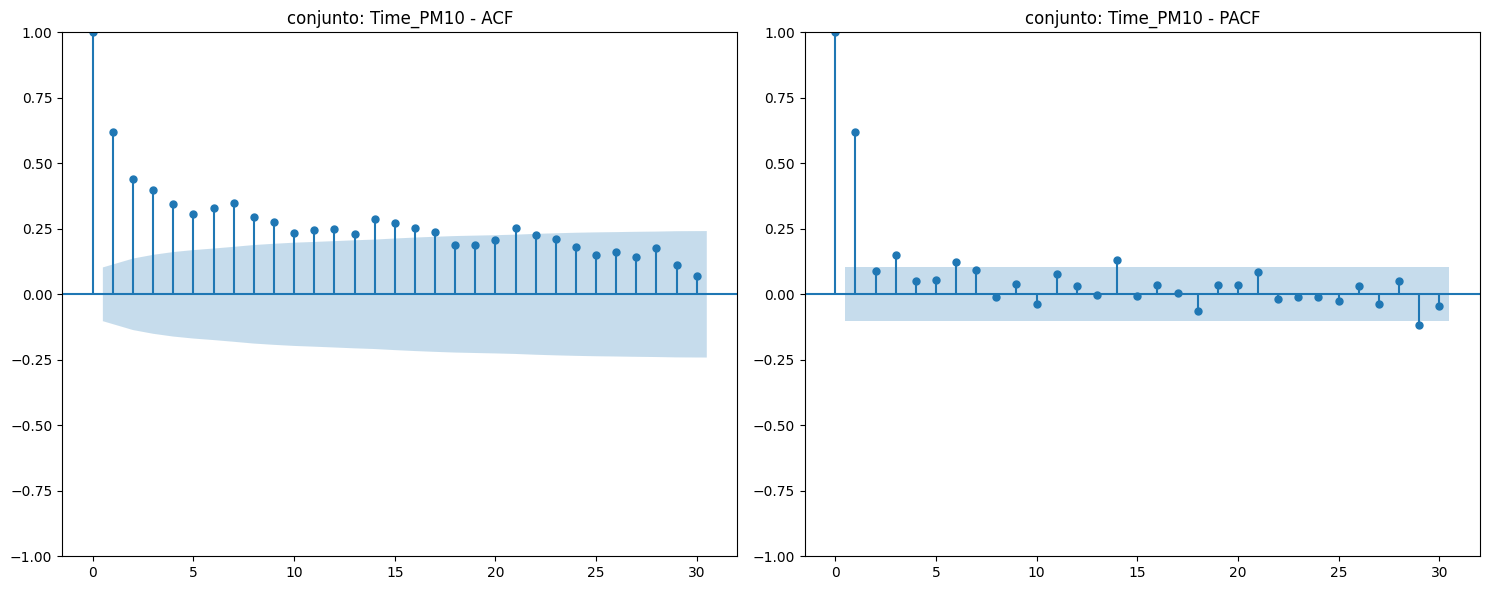

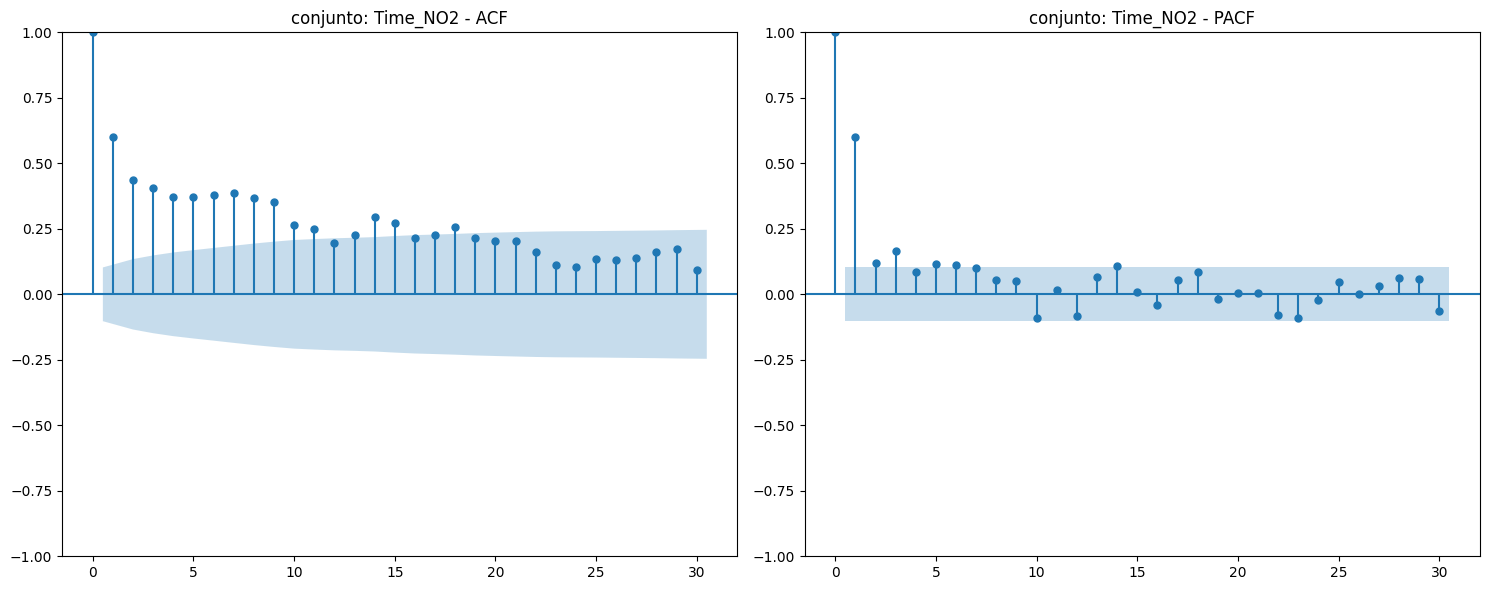

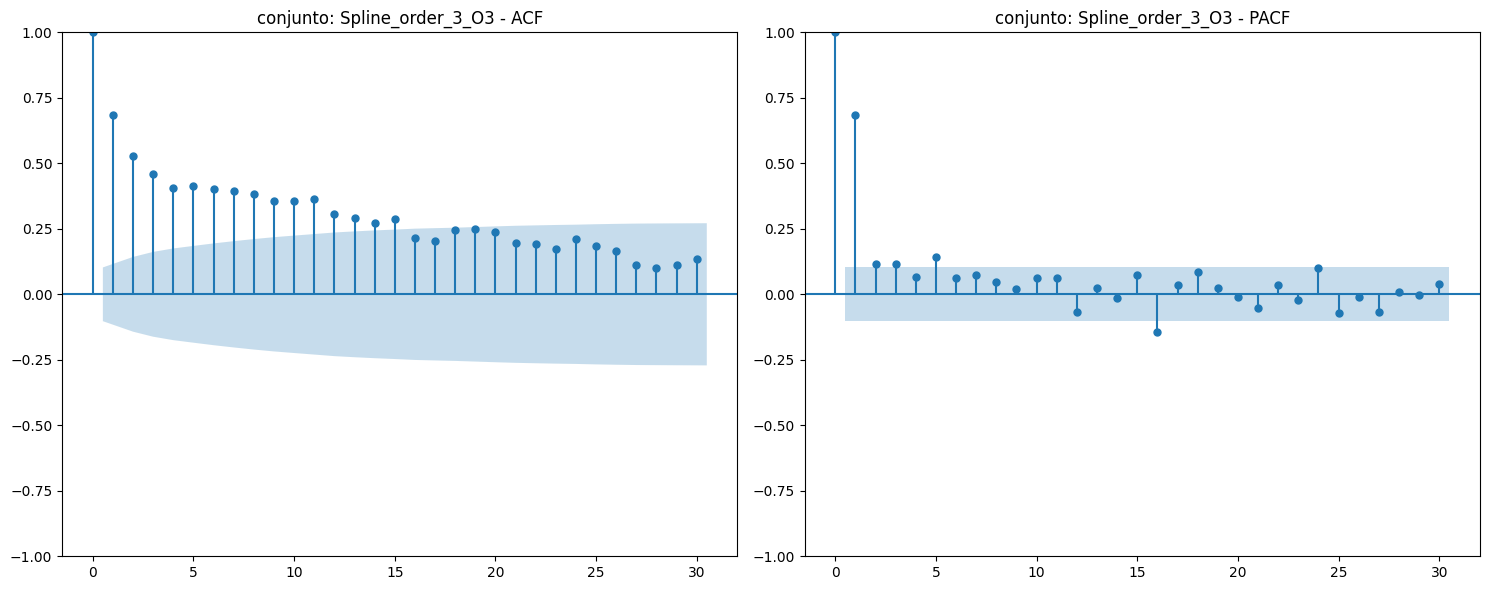

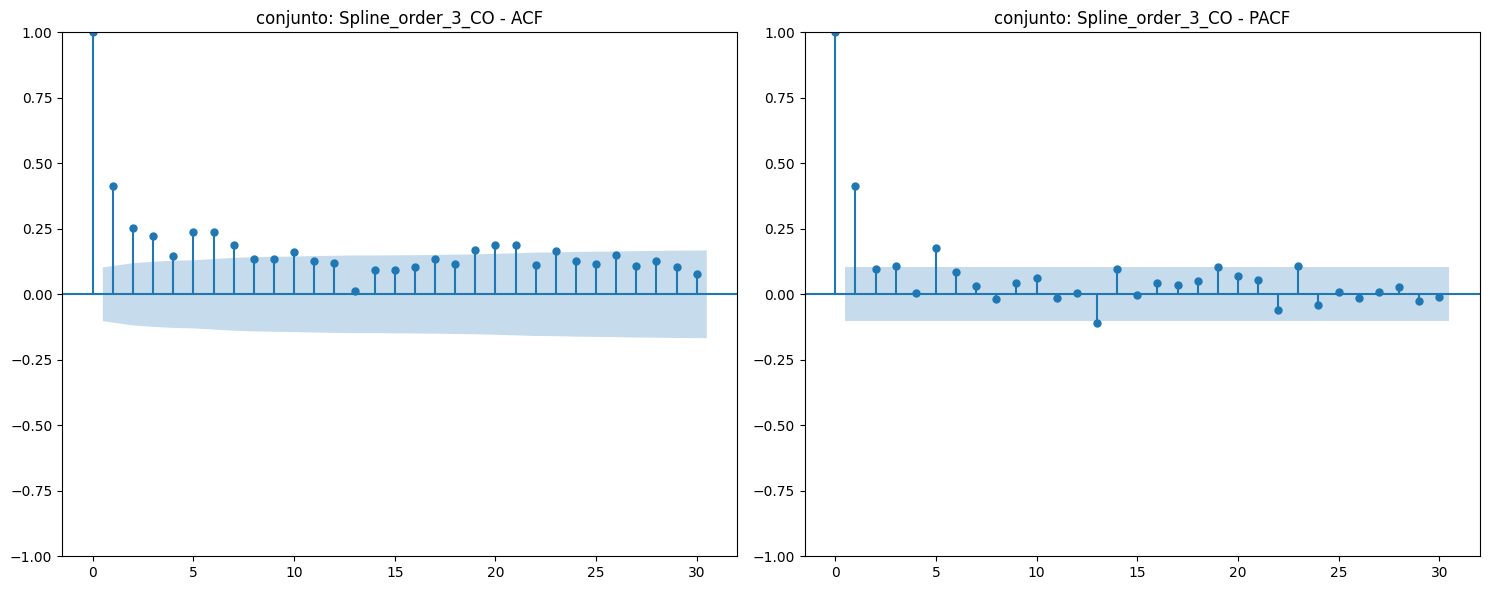

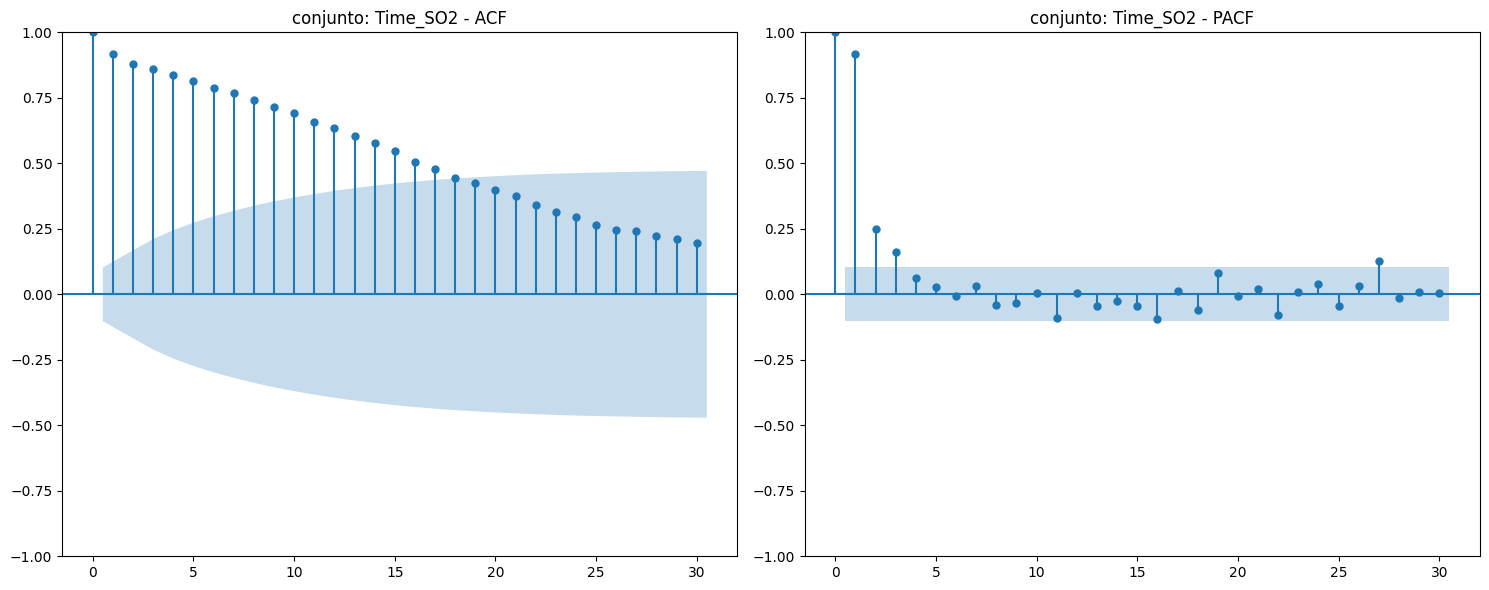

In [ ]:

for column in df.columns:
    acf_pacf(df[column], lags=30, title_prefix=f"conjunto: {column}")

In [ ]:
df.info()

#treinamento

In [ ]:

train_data = df.loc['2017-01-01':'2017-10-31']  # Treinamento: Janeiro a Outubro de 2017

test_data = df.loc['2017-11-01':'2017-12-31']   # Teste: Novembro e Dezembro de 2017


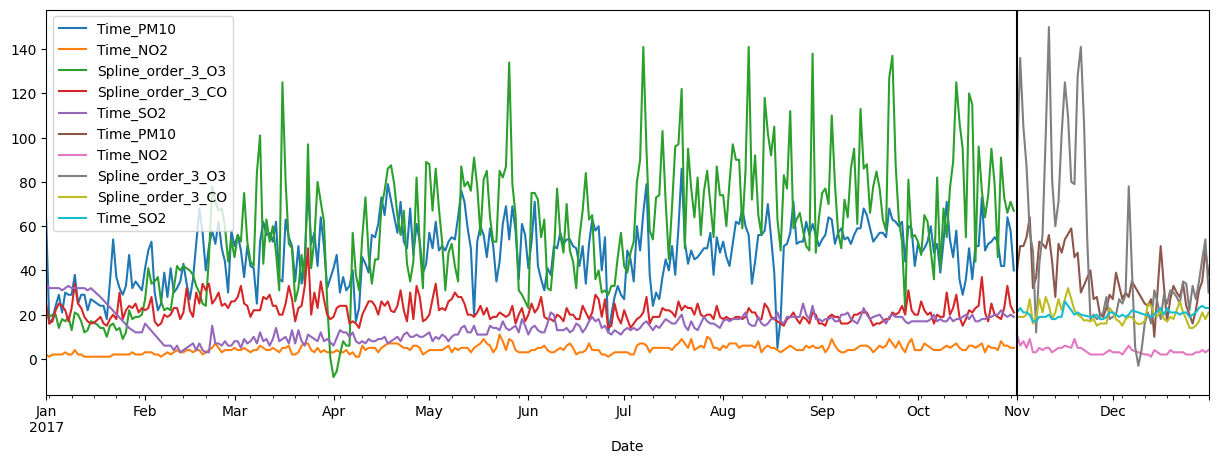

In [ ]:
fig,ax = plt.subplots(figsize=(15,5))
train_data.plot(ax=ax,label='training set')
test_data.plot(ax=ax,label='test set')
ax.axvline('2017-11-01',color='black')
plt.show()

#normalização

In [ ]:
scaler_pm10 = MinMaxScaler()

scaler_pm10.fit(train_data['Time_PM10'].values.reshape(-1, 1))

scaler_no2 = MinMaxScaler()

scaler_no2.fit(train_data['Time_NO2'].values.reshape(-1, 1))

scaler_so2 = MinMaxScaler()

scaler_so2.fit(train_data['Time_SO2'].values.reshape(-1, 1))

scaler_o3 = MinMaxScaler()
scaler_o3.fit(train_data['Spline_order_3_O3'].values.reshape(-1, 1))

scaler_co = MinMaxScaler()
scaler_co.fit(train_data['Spline_order_3_CO'].values.reshape(-1, 1))

MinMaxScaler()

In [ ]:

train_data_normalized = train_data.copy()
train_data_normalized['Time_PM10'] = scaler_pm10.transform(train_data['Time_PM10'].values.reshape(-1, 1))
train_data_normalized['Time_NO2'] = scaler_no2.transform(train_data['Time_NO2'].values.reshape(-1, 1))
train_data_normalized['Time_SO2'] = scaler_so2.transform(train_data['Time_SO2'].values.reshape(-1, 1))
train_data_normalized['Spline_order_3_O3'] = scaler_o3.transform(train_data['Spline_order_3_O3'].values.reshape(-1, 1))
train_data_normalized['Spline_order_3_CO'] = scaler_co.transform(train_data['Spline_order_3_CO'].values.reshape(-1, 1))

# Normalizar os dados de teste
test_data_normalized = test_data.copy()
test_data_normalized['Time_PM10'] = scaler_pm10.transform(test_data['Time_PM10'].values.reshape(-1, 1))
test_data_normalized['Time_NO2'] = scaler_no2.transform(test_data['Time_NO2'].values.reshape(-1, 1))
test_data_normalized['Time_SO2'] = scaler_so2.transform(test_data['Time_SO2'].values.reshape(-1, 1))
test_data_normalized['Spline_order_3_O3'] = scaler_o3.transform(test_data['Spline_order_3_O3'].values.reshape(-1, 1))
test_data_normalized['Spline_order_3_CO'] = scaler_co.transform(test_data['Spline_order_3_CO'].values.reshape(-1, 1))

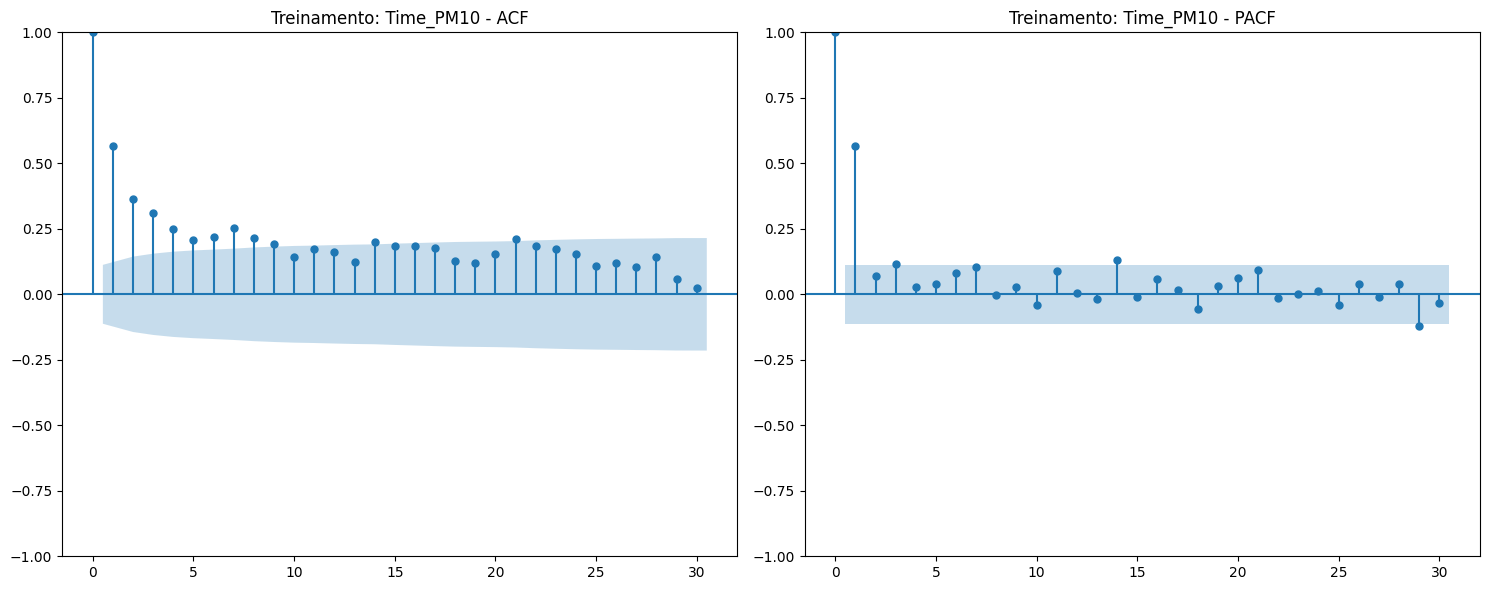

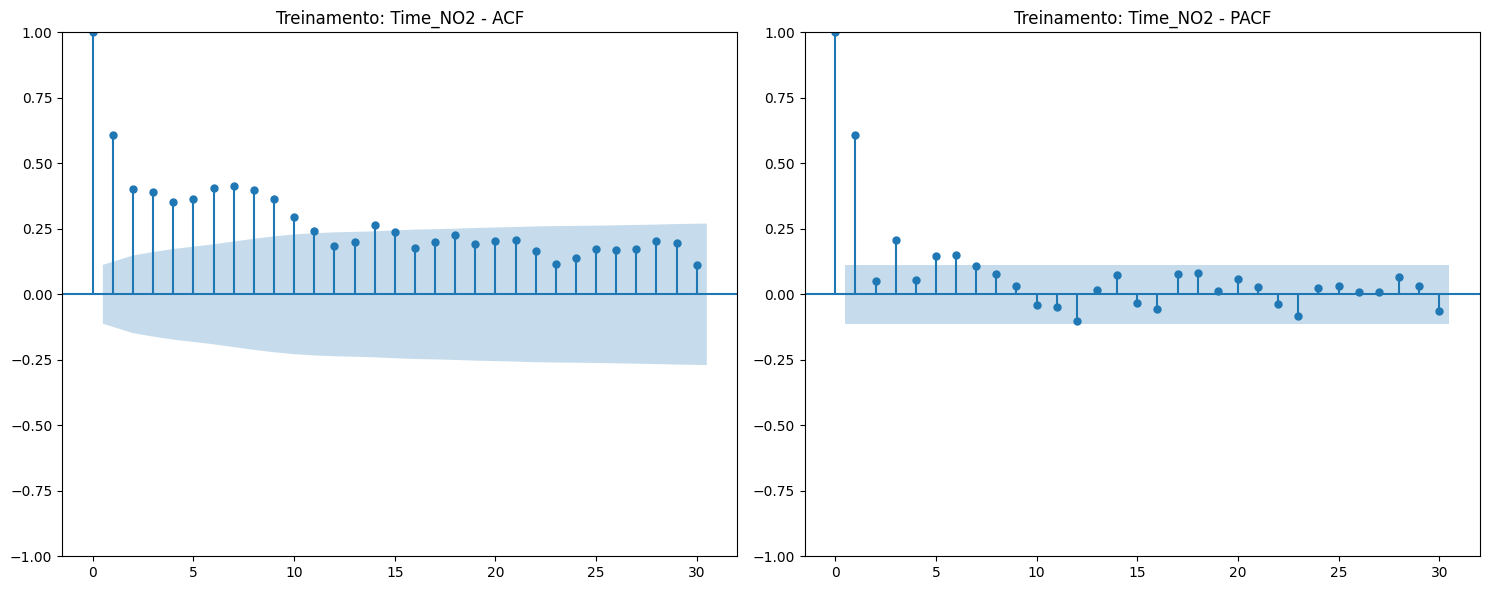

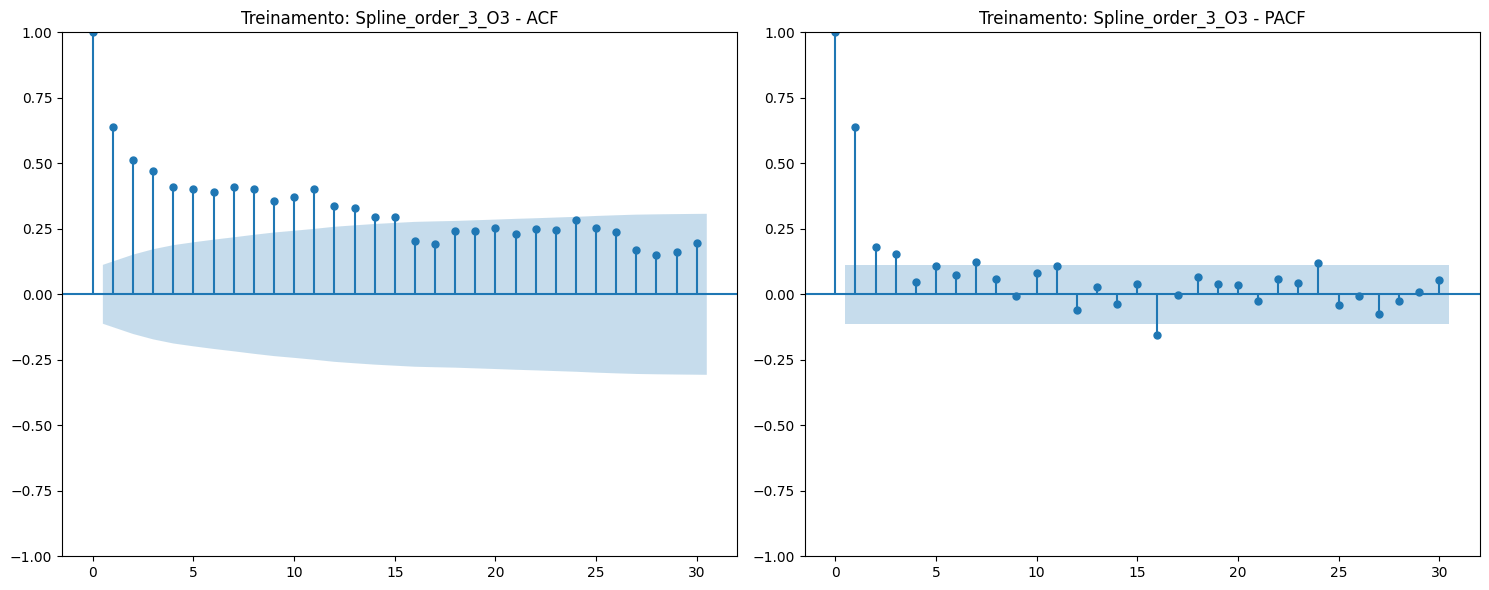

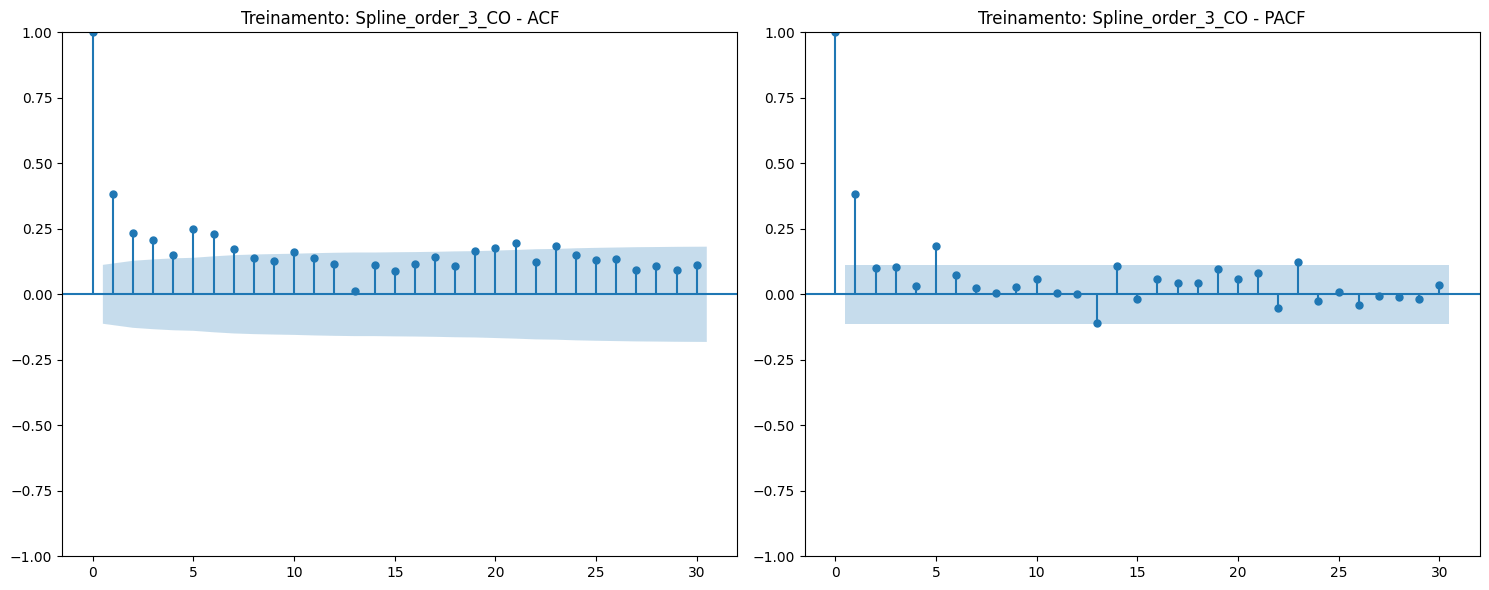

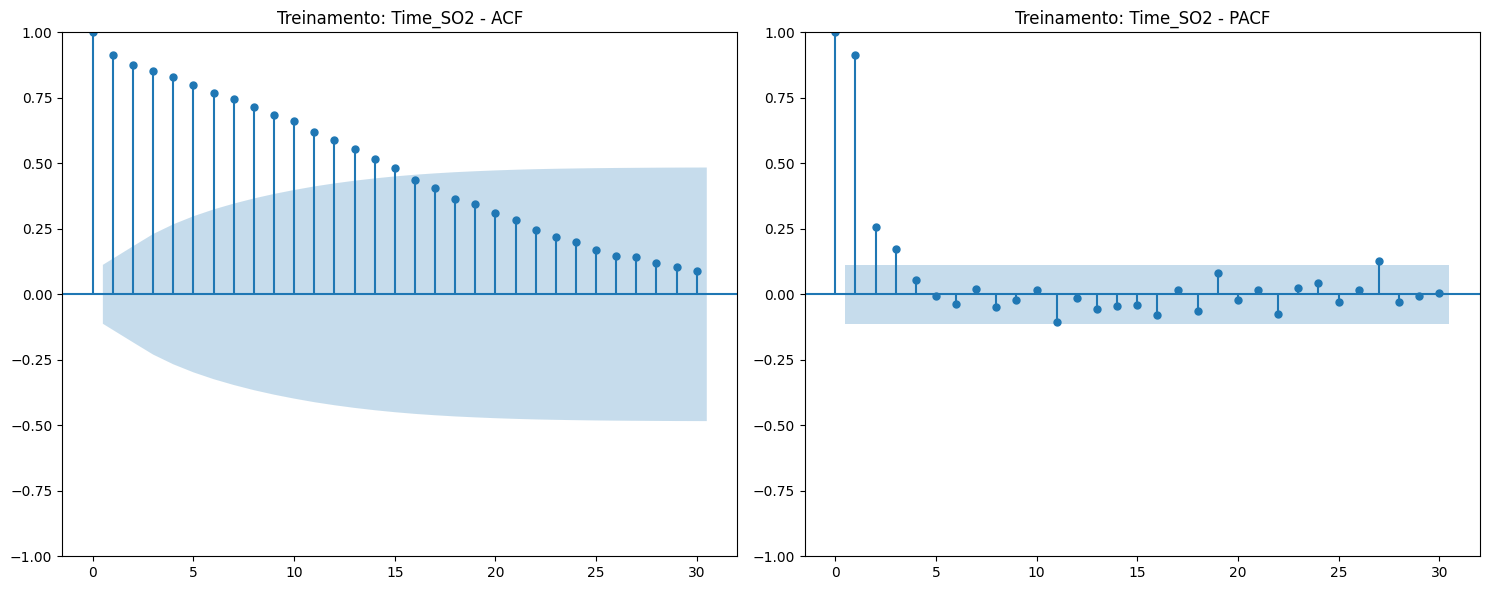

In [ ]:
# Para o conjunto de treinamento
for column in train_data_normalized.columns:
    acf_pacf(train_data_normalized[column], lags=30, title_prefix=f"Treinamento: {column}")

In [ ]:
train_data.info()

In [ ]:

train_pm10=train_data_normalized['Time_PM10']
train_no2=train_data_normalized['Time_NO2']
train_o3=train_data_normalized['Spline_order_3_O3']
train_co=train_data_normalized['Spline_order_3_CO']
train_so2=train_data_normalized['Time_SO2']

test_pm10 =test_data_normalized['Time_PM10']
test_no2 =test_data_normalized['Time_NO2']
test_o3 =test_data_normalized['Spline_order_3_O3']
test_co =test_data_normalized['Spline_order_3_CO']
test_so2 =test_data_normalized['Time_SO2']

#diferenciação da coluna so2

In [ ]:
import pandas as pd

# Diferenciação simples
train_so2_diff = train_so2.diff().dropna()

# Visualizar a série diferenciada
train_so2_diff.plot(title='Série SO2 Diferenciada')


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_so2_diff)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
    print("A série diferenciada é estacionária.")
else:
    print("A série ainda não é estacionária.")


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decomposição sazonal (ajuste o parâmetro period conforme necessário, ex.: 12 para dados mensais)
decomposicao = seasonal_decompose(train_so2_diff, model='additive', period=30)
decomposicao.plot()
plt.show()

#tendencia,sazonalidade das colunas

Analisando sazonalidade para a coluna: Time_PM10


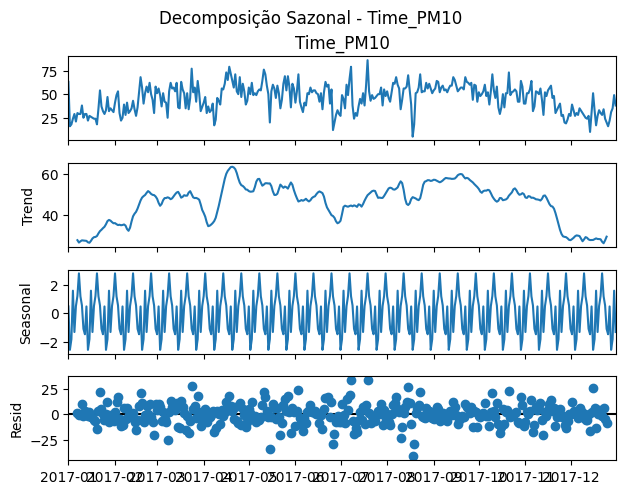

Analisando sazonalidade para a coluna: Time_NO2


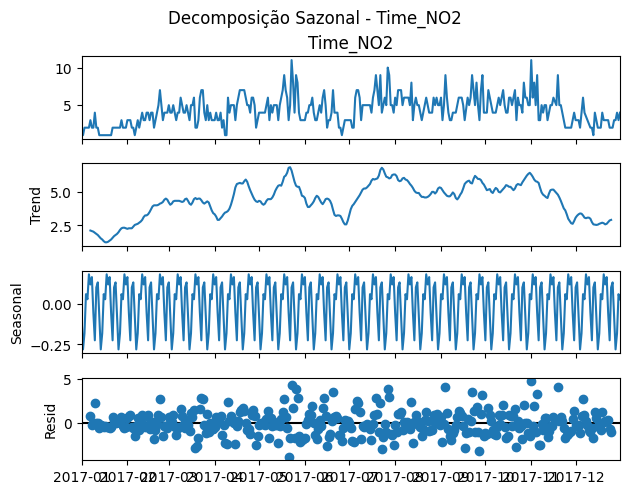

Analisando sazonalidade para a coluna: Spline_order_3_O3


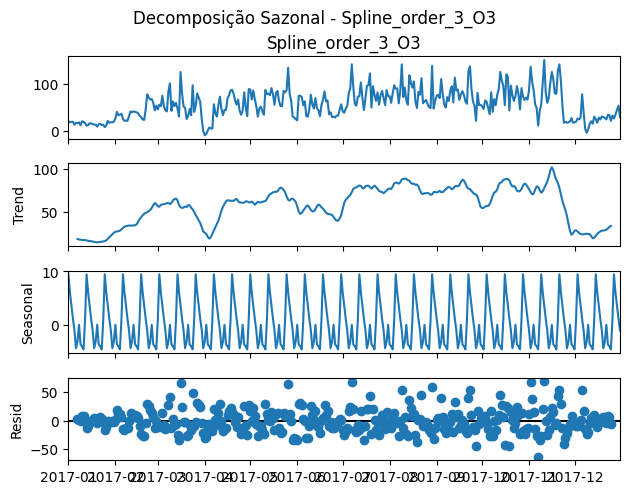

Analisando sazonalidade para a coluna: Spline_order_3_CO


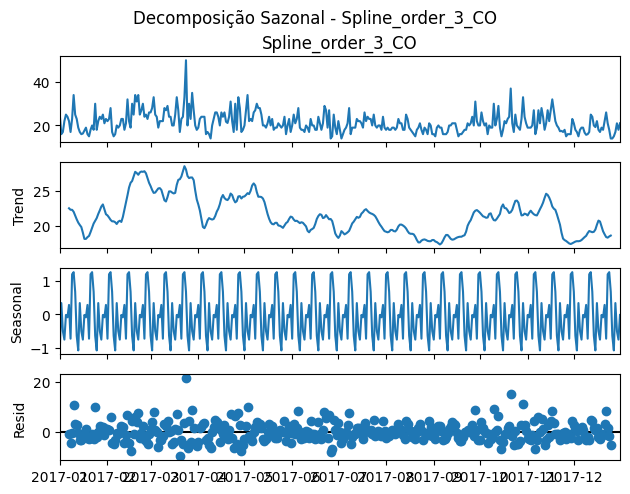

Analisando sazonalidade para a coluna: Time_SO2


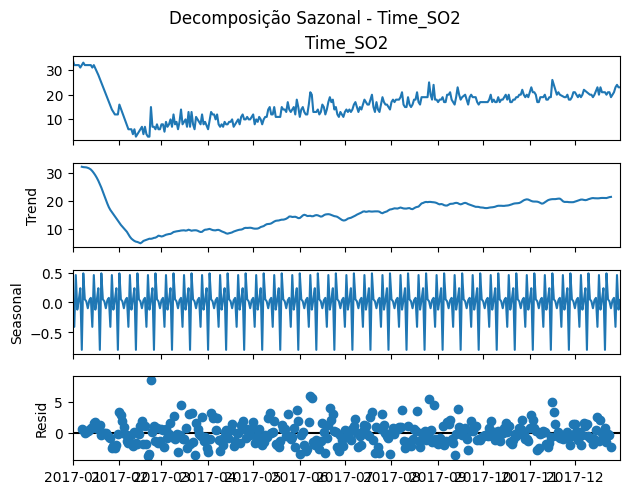

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Iterar por cada coluna do DataFrame
for coluna in df.columns:
    print(f"Analisando sazonalidade para a coluna: {coluna}")
    serie_temporal = df[coluna]

    # Realizar decomposição sazonal (ajuste o período, ex.: 12 para dados mensais)
    decomposicao = seasonal_decompose(serie_temporal, model='additive', period=12)

    # Plotar os componentes
    decomposicao.plot()
    plt.suptitle(f"Decomposição Sazonal - {coluna}", y=1.02)
    plt.show()


#modelo sarima

In [ ]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
from pmdarima import auto_arima

# Definir nomes das variáveis de treino e teste
dados = {
    'pm10': {'treino': train_pm10, 'teste': test_pm10},
    'so2': {'treino': train_so2_diff, 'teste': test_so2},
    'o3': {'treino': train_o3, 'teste': test_o3},
    'co': {'treino': train_co, 'teste': test_co},
    'no2': {'treino': train_no2, 'teste': test_no2}
    # Adicione outras séries aqui
}

# Dicionário para armazenar resultados
resultados = {}

# Loop pelas séries temporais
for nome, valores in dados.items():
    print(f"\nAnalisando série: {nome.upper()}")

    # Obter treino e teste
    treino = valores['treino']
    teste = valores['teste']

    # Ajustar modelo SARIMA automaticamente
    modelo_auto = auto_arima(
        treino,
        seasonal=True,
        m=12,  # Ajuste conforme o período sazonal
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

    # Treinar modelo no conjunto de treinamento
    modelo_final = modelo_auto.fit(treino)

    # Fazer previsões no conjunto de teste
    previsoes = modelo_final.predict(n_periods=len(teste))

    # Calcular métricas
    mae = mean_absolute_error(teste, previsoes)
    rmse = np.sqrt(mean_squared_error(teste, previsoes))
    mape = np.mean(np.abs((teste - previsoes) / teste)) * 100

    # Armazenar resultados no dicionário
    resultados[nome] = {
        'modelo': modelo_final,
        'previsoes': previsoes,
        'valores_reais': teste.values,
        'mae': mae,
        'rmse': rmse,
        'mape': mape
    }

    # Exibir métricas
    print(f"Métricas para {nome.upper()}:")
    print(f"  MAE: {mae}")
    print(f"  RMSE: {rmse}")
    print(f"  MAPE: {mape}%")

# Criar DataFrame com métricas resumidas
metricas_df = pd.DataFrame({
    serie: {
        'MAE': resultados[serie]['mae'],
        'RMSE': resultados[serie]['rmse'],
        'MAPE': resultados[serie]['mape']
    } for serie in dados.keys()
}).T

print("\nResumo das Métricas:")
print(metricas_df)

# Opcional: salvar métricas e previsões
metricas_df.to_csv('metricas_sarima.csv')



Analisando série: PM10
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-326.663, Time=6.93 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-253.692, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-271.223, Time=0.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-298.060, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-255.681, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-328.657, Time=1.92 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-330.716, Time=0.81 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-328.656, Time=1.87 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-331.839, Time=0.77 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-329.856, Time=1.86 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-329.855, Time=4.39 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-327.860, Time=1.91 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-330.106, Time=0.53 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-333.625, Time=0.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-331.648, Time=1.36 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-331.646, Time=1.66 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-329.658, Time=2.46 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-299.864, Time=0.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-273.197, Time=0.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-331.786, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-292.192, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12]             : AIC=-334.546, Time=0.68 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=-332.560, Time=2.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=-332.559, Time=1.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-330.617, Time=1.21 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-301.829, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=-275.194, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12]             : AIC=-332.764, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[12]             : AIC=-332.829, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12]             : AIC=-331.420, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=-294.192, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=-331.674, Time=0.37 sec

Best model:  ARIMA(1,1,1)(0,0,0)[12]          
Total fit time: 36.137 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Métricas para PM10:
  MAE: 0.2038236413404001
  RMSE: 0.23921298239150773
  MAPE: 86.66293416047112%

Analisando série: SO2
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=-742.646, Time=2.32 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=-691.971, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=-724.103, Time=0.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=-746.374, Time=0.55 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=-693.839, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=-747.667, Time=0.20 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=-746.474, Time=0.49 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=-745.750, Time=1.40 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=-747.013, Time=0.26 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[12] intercept   : AIC=-747.437, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=-725.998, Time=0.06 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=-746.273, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[12]             : AIC=-749.151, Time=0.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[12]             : AIC=-747.999, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12]             : AIC=-747.894, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[12]             : AIC=-747.249, Time=0.78 sec
 ARIMA(1,0,1)(0,0,0)[12]             : AIC=-748.447, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[12]             : AIC=-748.863, Time=0.74 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=-727.760, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[12]             : AIC=-747.714, Time=0.84 sec

Best model:  ARIMA(0,0,1)(0,0,0)[12]          
Total fit time: 9.647 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Métricas para SO2:
  MAE: 0.5616484633992811
  RMSE: 0.5644256945363921
  MAPE: 99.96149765829145%

Analisando série: O3
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-309.803, Time=3.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-229.536, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-261.150, Time=0.52 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-294.337, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-231.525, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-311.755, Time=1.85 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-313.876, Time=0.79 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-311.849, Time=2.09 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.72 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-315.798, Time=0.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,0)[12] intercept   : AIC=-314.083, Time=3.80 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-314.049, Time=2.26 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=-312.202, Time=2.24 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-316.979, Time=0.39 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-315.554, Time=1.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-315.472, Time=1.22 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-315.409, Time=1.82 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-296.318, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-262.711, Time=0.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-312.881, Time=0.29 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-280.207, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[12]             : AIC=-317.282, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=-315.859, Time=0.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=-315.772, Time=0.40 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-315.843, Time=2.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-298.129, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=-264.687, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12]             : AIC=-315.562, Time=0.46 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=-315.642, Time=1.50 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=-314.096, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[12]             : AIC=-282.166, Time=0.15 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=-314.403, Time=0.42 sec

Best model:  ARIMA(1,1,1)(0,0,0)[12]          
Total fit time: 31.135 seconds
Métricas para O3:
  MAE: 0.2794563532863235
  RMSE: 0.30599256663254604
  MAPE: 141.09633967920942%

Analisando série: CO
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-411.490, Time=2.92 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-300.814, Time=0.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-343.040, Time=0.39 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-406.583, Time=0.85 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-302.812, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-413.490, Time=1.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-415.635, Time=0.97 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-413.492, Time=2.22 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-416.918, Time=1.10 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-414.666, Time=4.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-414.919, Time=1.66 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-412.917, Time=1.98 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-418.353, Time=0.28 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=-416.358, Time=0.90 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-416.358, Time=1.84 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-414.357, Time=2.44 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=-407.840, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,0)[12] intercept   : AIC=-416.669, Time=2.48 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=-418.916, Time=0.94 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=-416.917, Time=2.01 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-416.917, Time=1.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-414.917, Time=1.07 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=-344.963, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=-416.918, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=-369.110, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[12]             : AIC=-420.898, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,0)[12]             : AIC=-418.899, Time=0.32 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=-418.899, Time=0.64 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(1,0,1)[12]             : AIC=-416.900, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=-409.818, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=-346.963, Time=0.05 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[12]             : AIC=-418.900, Time=0.19 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12]             : AIC=-418.900, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=-420.329, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[12]             : AIC=-371.107, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12]             : AIC=-417.463, Time=0.28 sec

Best model:  ARIMA(1,1,1)(0,0,0)[12]          
Total fit time: 35.019 seconds
Métricas para CO:
  MAE: 0.11233597512519121
  RMSE: 0.12760878429256042
  MAPE: inf%

Analisando série: NO2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-318.571, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=-229.658, Time=0.08 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=-248.655, Time=0.45 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-298.997, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=-231.647, Time=0.07 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-320.939, Time=4.16 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-316.483, Time=0.75 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=-319.203, Time=4.49 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-320.371, Time=1.99 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-317.176, Time=7.65 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=-322.803, Time=1.42 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=-318.133, Time=0.52 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-321.070, Time=1.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=-321.056, Time=4.17 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=-322.228, Time=3.93 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=-319.036, Time=5.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12] intercept   : AIC=-324.145, Time=1.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=-320.070, Time=0.40 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12] intercept   : AIC=-322.439, Time=1.67 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[12] intercept   : AIC=-322.407, Time=5.13 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12] intercept   : AIC=-323.660, Time=1.86 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=-320.372, Time=4.31 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,1)[12] intercept   : AIC=-322.690, Time=1.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-318.531, Time=1.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,1)[12] intercept   : AIC=-320.709, Time=1.36 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,1)[12]             : AIC=-325.056, Time=0.36 sec
 ARIMA(0,1,2)(0,0,0)[12]             : AIC=-321.203, Time=0.14 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,1)[12]             : AIC=-323.261, Time=0.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,2)[12]             : AIC=-323.249, Time=2.82 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,0)[12]             : AIC=-324.636, Time=1.42 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(1,0,2)[12]             : AIC=-321.262, Time=1.78 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[12]             : AIC=-300.354, Time=0.24 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[12]             : AIC=-323.811, Time=0.66 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,3)(0,0,1)[12]             : AIC=-323.725, Time=0.62 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,1)[12]             : AIC=-319.256, Time=0.41 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,3)(0,0,1)[12]             : AIC=-321.898, Time=1.35 sec

Best model:  ARIMA(0,1,2)(0,0,1)[12]          
Total fit time: 69.521 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Métricas para NO2:
  MAE: 0.2176755640122576
  RMSE: 0.24983631858458516
  MAPE: inf%

Resumo das Métricas:
           MAE      RMSE        MAPE
pm10  0.203824  0.239213   86.662934
so2   0.561648  0.564426   99.961498
o3    0.279456  0.305993  141.096340
co    0.112336  0.127609         inf
no2   0.217676  0.249836         inf


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
def calcular_metricas(valores_reais, previsoes):
    """
    Calcula MAE, RMSE e MAPE para previsões.

    Args:
    - valores_reais: Valores reais (array ou Series).
    - previsoes: Previsões do modelo (array ou Series).

    Returns:
    - Um dicionário com as métricas.
    """
    mae = mean_absolute_error(valores_reais, previsoes)
    rmse = np.sqrt(mean_squared_error(valores_reais, previsoes))
    mape = np.mean(np.abs((valores_reais - previsoes) / np.maximum(valores_reais, 1e-5))) * 100
    return {"MAE": mae, "RMSE": rmse, "MAPE": mape}


In [ ]:
metricas = calcular_metricas(teste, previsoes)
resultados[nome] = {
    'modelo': modelo_final,
    'previsoes': previsoes,
    'valores_reais': teste.values,
    **metricas
}


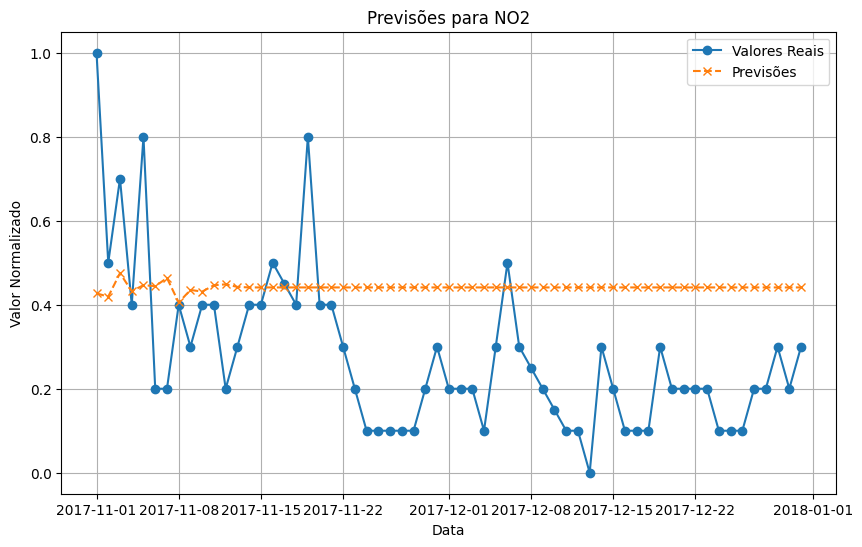

In [ ]:
import matplotlib.pyplot as plt

# Visualização de previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.plot(teste.index, teste, label='Valores Reais', marker='o')
plt.plot(teste.index, previsoes, label='Previsões', linestyle='--', marker='x')
plt.title(f"Previsões para {nome.upper()}")
plt.xlabel("Data")
plt.ylabel("Valor Normalizado")
plt.legend()
plt.grid()
plt.show()


In [ ]:
##https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd

UTILIZAÇÃO DE JANELAS

#janela

In [ ]:

def create_sliding_windows(series, window_size):

    list_of_sliding_windows = []
    list_size_to_iterate = len(series) - window_size
    for i in range(0, list_size_to_iterate):
        window = series[i: i + window_size + 1]
        list_of_sliding_windows.append(window)

    return np.array(list_of_sliding_windows).reshape(len(list_of_sliding_windows), window_size+1)

In [ ]:
#windows para cada coluna com 30
#pm10
windows_train_pm10 = create_sliding_windows(train_pm10, 30)
windows_test_pm10 = create_sliding_windows(test_pm10,30)
#no2
windows_train_no2 = create_sliding_windows(train_no2, 30)
windows_test_no2 = create_sliding_windows(test_no2,30)
#o3
windows_train_o3 = create_sliding_windows(train_o3, 30)
windows_test_o3 = create_sliding_windows(test_o3,30)
#co

windows_train_co = create_sliding_windows(train_co, 30)
windows_test_co = create_sliding_windows(test_co,30)
#co
windows_train_so2 = create_sliding_windows(train_so2, 30)
windows_test_so2  = create_sliding_windows(test_so2,30)

##vendo as janelas

In [ ]:
#primeira janla
windows_train_so2[0]

array([1.        , 0.93548387, 0.93548387, 0.93548387, 0.93548387,
       0.90322581, 0.93548387, 0.96774194, 0.93548387, 0.93548387,
       0.93548387, 0.93548387, 0.93548387, 0.90322581, 0.93548387,
       0.89247312, 0.84946237, 0.80645161, 0.7562724 , 0.70609319,
       0.65591398, 0.60573477, 0.55555556, 0.50537634, 0.45519713,
       0.40501792, 0.35483871, 0.32258065, 0.29032258, 0.29032258,
       0.29032258])

In [ ]:
windows_train_so2[1]

array([0.93548387, 0.93548387, 0.93548387, 0.93548387, 0.90322581,
       0.93548387, 0.96774194, 0.93548387, 0.93548387, 0.93548387,
       0.93548387, 0.93548387, 0.90322581, 0.93548387, 0.89247312,
       0.84946237, 0.80645161, 0.7562724 , 0.70609319, 0.65591398,
       0.60573477, 0.55555556, 0.50537634, 0.45519713, 0.40501792,
       0.35483871, 0.32258065, 0.29032258, 0.29032258, 0.29032258,
       0.41935484])

In [ ]:
windows_train_so2[2]

array([0.93548387, 0.93548387, 0.93548387, 0.90322581, 0.93548387,
       0.96774194, 0.93548387, 0.93548387, 0.93548387, 0.93548387,
       0.93548387, 0.90322581, 0.93548387, 0.89247312, 0.84946237,
       0.80645161, 0.7562724 , 0.70609319, 0.65591398, 0.60573477,
       0.55555556, 0.50537634, 0.45519713, 0.40501792, 0.35483871,
       0.32258065, 0.29032258, 0.29032258, 0.29032258, 0.41935484,
       0.3655914 ])

In [ ]:
#antes da ultimma
windows_train_so2[-2]

array([0.4516129 , 0.4516129 , 0.4516129 , 0.4516129 , 0.4516129 ,
       0.48387097, 0.5483871 , 0.4516129 , 0.48387097, 0.4516129 ,
       0.4516129 , 0.51612903, 0.4516129 , 0.48387097, 0.48387097,
       0.51612903, 0.5483871 , 0.48387097, 0.5483871 , 0.4516129 ,
       0.4516129 , 0.48387097, 0.48387097, 0.51612903, 0.51612903,
       0.5483871 , 0.5483871 , 0.61290323, 0.5483871 , 0.51612903,
       0.5483871 ])

In [ ]:
#ultima janela
windows_train_so2[-1]

array([0.4516129 , 0.4516129 , 0.4516129 , 0.4516129 , 0.48387097,
       0.5483871 , 0.4516129 , 0.48387097, 0.4516129 , 0.4516129 ,
       0.51612903, 0.4516129 , 0.48387097, 0.48387097, 0.51612903,
       0.5483871 , 0.48387097, 0.5483871 , 0.4516129 , 0.4516129 ,
       0.48387097, 0.48387097, 0.51612903, 0.51612903, 0.5483871 ,
       0.5483871 , 0.61290323, 0.5483871 , 0.51612903, 0.5483871 ,
       0.51612903])

#validação

In [ ]:
perc_val = 0.2  # 20% para validação

# SO2
tam_val_so2 = int(len(windows_train_so2) * perc_val)
X_train_so2, y_train_so2 = windows_train_so2[:-tam_val_so2,:-1], windows_train_so2[:-tam_val_so2, -1]
X_val_so2, y_val_so2 = windows_train_so2[-tam_val_so2:, :-1], windows_train_so2[-tam_val_so2:, -1]

# CO
tam_val_co = int(len(windows_train_co) * perc_val)
X_train_co, y_train_co = windows_train_co[:-tam_val_co, :-1], windows_train_co[:-tam_val_co, -1]
X_val_co, y_val_co = windows_train_co[-tam_val_co:, :-1], windows_train_co[-tam_val_co:, -1]

# NO2
tam_val_no2 = int(len(windows_train_no2) * perc_val)
X_train_no2, y_train_no2 = windows_train_no2[:-tam_val_no2, :-1], windows_train_no2[:-tam_val_no2, -1]
X_val_no2, y_val_no2 = windows_train_no2[-tam_val_no2:, :-1], windows_train_no2[-tam_val_no2:, -1]

# O3
tam_val_o3 = int(len(windows_train_o3) * perc_val)
X_train_o3, y_train_o3 = windows_train_o3[:-tam_val_o3, :-1], windows_train_o3[:-tam_val_o3, -1]
X_val_o3, y_val_o3 = windows_train_o3[-tam_val_o3:, :-1], windows_train_o3[-tam_val_o3:, -1]

# PM10
tam_val_pm10 = int(len(windows_train_pm10) * perc_val)
X_train_pm10, y_train_pm10 = windows_train_pm10[:-tam_val_pm10, :-1], windows_train_pm10[:-tam_val_pm10, -1]
X_val_pm10, y_val_pm10 = windows_train_pm10[-tam_val_pm10:, :-1], windows_train_pm10[-tam_val_pm10:, -1]


##test

In [ ]:
# SO2
X_test_so2, y_test_so2 = windows_test_so2[:, 0:-1], windows_test_so2[:, -1]
# CO
X_test_co, y_test_co = windows_test_co[:, 0:-1], windows_test_co[:, -1]
# NO2
X_test_no2, y_test_no2 = windows_test_no2[:, 0:-1], windows_test_no2[:, -1]
# O3
X_test_o3, y_test_o3 = windows_test_o3[:, 0:-1], windows_test_o3[:, -1]
# PM10
X_test_pm10, y_test_pm10 = windows_test_pm10[:, 0:-1], windows_test_pm10[:, -1]

#Selecionar lag

In [ ]:
def select_lag_acf(serie, max_lag):
    from statsmodels.tsa.stattools import acf
    #x = serie[0: max_lag+1]

    acf_x, confint = acf(serie, nlags=max_lag, alpha=.05)

    limiar_superior = confint[:, 1] - acf_x
    limiar_inferior = confint[:, 0] - acf_x

    lags_selecionados = []

    for i in range(1, max_lag+1):


        if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
            lags_selecionados.append(i-1)  #-1 por conta que o lag 1 em python é o 0

    #caso nenhum lag seja selecionado, essa atividade de seleção para o gridsearch encontrar a melhor combinação de lags
    if len(lags_selecionados)==0:


        print('NENHUM LAG POR ACF')
        lags_selecionados = [i for i in range(max_lag)]

    print('LAGS', lags_selecionados)

    #inverte o valor dos lags para usar na lista de dados
    lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]



    return lags_selecionados

###pm10

In [ ]:
lags_chosen_pm10 = select_lag_acf(train_pm10, 30)

LAGS [0, 1, 2, 3, 4, 5, 6, 7, 8, 13, 20]


In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[0,lags_chosen_pm10]

array([0.34567901, 0.37037037, 0.33333333, 0.51851852, 0.34567901,
       0.2962963 , 0.33333333, 0.39506173, 0.60493827, 0.24691358,
       0.40740741])

In [ ]:
#𝑦train contém os valores que o modelo deve prever.
y_train_pm10[0]

0.32098765432098764

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[1,lags_chosen_pm10]

array([0.32098765, 0.34567901, 0.37037037, 0.33333333, 0.51851852,
       0.34567901, 0.2962963 , 0.33333333, 0.39506173, 0.2345679 ,
       0.24691358])

In [ ]:
#
y_train_pm10[1]

0.4444444444444445

In [ ]:
#Selecionar apenas os lags mais relevantes para treinamento ou análise
X_train_pm10[2,lags_chosen_pm10]

array([0.44444444, 0.32098765, 0.34567901, 0.37037037, 0.33333333,
       0.51851852, 0.34567901, 0.2962963 , 0.33333333, 0.2345679 ,
       0.2962963 ])

###so2

In [ ]:
lags_chosen_so2 = select_lag_acf(train_so2, 30)

LAGS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
X_train_so2[0,lags_chosen_so2]

array([0.29032258, 0.29032258, 0.32258065, 0.35483871, 0.40501792,
       0.45519713, 0.50537634, 0.55555556, 0.60573477, 0.65591398,
       0.70609319, 0.7562724 , 0.80645161, 0.84946237, 0.89247312])

In [ ]:
#𝑦train contém os valores que o modelo deve prever.
y_train_so2[0]

0.29032258064516125

###no2

In [ ]:
lags_chosen_no2 = select_lag_acf(train_no2, 30)

LAGS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13]


In [ ]:
X_train_no2[0,lags_chosen_no2]

array([0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. ])

In [ ]:
y_train_no2[0]

0.1

###o3

In [ ]:
lags_chosen_o3 = select_lag_acf(train_o3, 30)

LAGS [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:

X_train_o3[0,lags_chosen_o3]

array([0.18218153, 0.18218153, 0.1754781 , 0.20229182, 0.13525752,
       0.11514723, 0.14866438, 0.14196095, 0.16207124, 0.15536781,
       0.12185066, 0.14866438, 0.14866438, 0.15865264, 0.16507927])

In [ ]:
y_train_o3[0]

0.1888849621500044

###co

In [ ]:

lags_chosen_co = select_lag_acf(train_co, 30)

LAGS [0, 1, 2, 3, 4, 5, 6, 9, 18, 19, 20, 22]


In [ ]:

X_train_co[0,lags_chosen_co]

array([0.19444444, 0.30555556, 0.25      , 0.27777778, 0.22222222,
       0.11111111, 0.44444444, 0.11111111, 0.25      , 0.30555556,
       0.55555556, 0.08333333])

In [ ]:
y_train_co[0]

0.25

#treinamento E MODELAGEM

###pm10

In [ ]:
X_train_acf_pm10 = X_train_pm10[:, lags_chosen_pm10]
X_val_acf_pm10 = X_val_pm10[:,lags_chosen_pm10]
X_test_acf_pm10 = X_test_pm10[:, lags_chosen_pm10]


##no2

In [ ]:

X_train_acf_no2 = X_train_no2[:, lags_chosen_no2]
X_val_acf_no2 = X_val_no2[:,lags_chosen_no2]
X_test_acf_no2 = X_test_no2[:, lags_chosen_no2]


##so2

In [ ]:
X_train_acf_so2 = X_train_so2[:, lags_chosen_so2]
X_val_acf_so2 = X_val_so2[:,lags_chosen_so2]
X_test_acf_so2 = X_test_so2[:, lags_chosen_so2]


##o3

In [ ]:

X_train_acf_o3 = X_train_o3[:, lags_chosen_o3]
X_val_acf_o3 = X_val_o3[:,lags_chosen_o3]
X_test_acf_o3 = X_test_o3[:, lags_chosen_o3]


##co

In [ ]:
X_train_acf_co = X_train_co [:, lags_chosen_co ]
X_val_acf_co  = X_val_co [:,lags_chosen_co ]
X_test_acf_co = X_test_co[:, lags_chosen_co ]


# Nova seção

##MLP - TREINAMENTO

In [ ]:
def treinar_mlp(x_train, y_train, x_val, y_val, num_exec):

    neuronios = [5, 10,25]
    func_activation = [ 'tanh','logistic', 'relu']
    alg_treinamento = ['lbfgs', 'sgd', 'adam']

    max_iteracoes = [5000, 10000, 20000]  # Tente valores maiore
    learning_rate = ['adaptive']#, 'invscaling', 'adaptive']

    best_result = np.Inf
    """para otimizar o código reduzindo os laços utilize o itertools:

    import itertools
    hyper_param = list(itertools.product(neuronios,func_activation,alg_treinamento,max_iteracoes, learning_rate))
    for i, j, l, m, n in hyper_param:

    """

    for i in range(0,len(neuronios)):
        for j in range(0,len(func_activation)):
            for l in range(0,len(alg_treinamento)):
                for m in range(0,len(max_iteracoes)):
                    for n in range(0,len(learning_rate)):

                        for e in range(0,num_exec):
                            mlp = MLPRegressor(hidden_layer_sizes=neuronios[i], activation=func_activation[j], solver=alg_treinamento[l], max_iter = max_iteracoes[m], learning_rate= learning_rate[n])
                            mlp.fit(x_train, y_train)
                            predict_validation = mlp.predict(x_val)

                            mse = MSE(y_val, predict_validation)


                            if mse < best_result:
                                best_result = mse
                                select_model = mlp
                                print('func: ', func_activation[j])





    return select_model

##pm10 - treinamento MLP

In [ ]:
modelo_PM10 =  treinar_mlp(X_train_acf_pm10, y_train_pm10, X_val_acf_pm10, y_val_pm10, 4)

func:  tanh
func:  tanh
func:  tanh
func:  logistic
func:  logistic
func:  logistic
func:  logistic
func:  tanh


In [ ]:
trainPredict_pm10 = modelo_PM10.predict(X_train_acf_pm10)

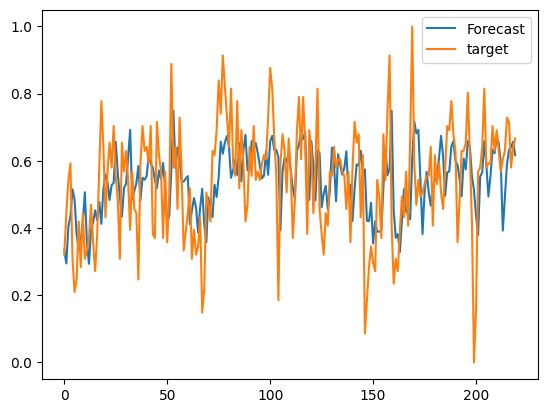

In [ ]:
plt.plot(trainPredict_pm10, label='Forecast')
plt.plot(y_train_pm10, label='target')
plt.legend()
plt.show()

In [ ]:
MSE(y_train_pm10,trainPredict_pm10 )

0.02241441509049148

In [ ]:
predictRealInterval = scaler_pm10.inverse_transform(trainPredict_pm10.reshape(1, -1))


In [ ]:
targetRealInterval =  scaler_pm10 .inverse_transform(y_train_pm10.reshape(1, -1) )

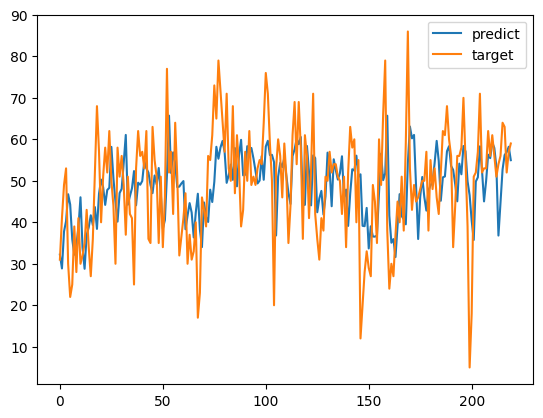

In [ ]:

plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true )) * 100

In [ ]:
MSE(targetRealInterval,predictRealInterval)

147.06097740871468

In [ ]:
MAPE(targetRealInterval,predictRealInterval)

27.14988714159891

###pm10_teste _mlp

In [ ]:
testPredict_pm10 = modelo_PM10.predict(X_test_acf_pm10)

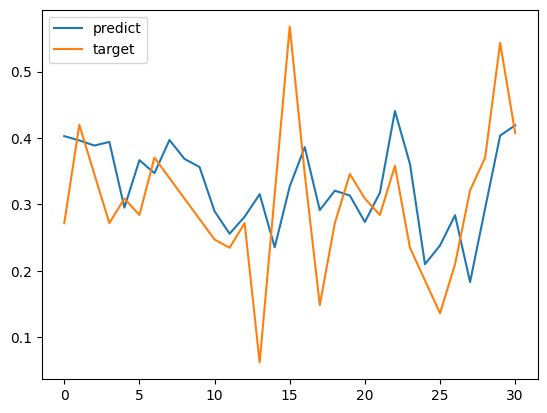

In [ ]:
plt.plot(testPredict_pm10, label = 'predict')
plt.plot(y_test_pm10, label= 'target')
plt.legend()
plt.show()

In [ ]:
predictRealInterval = scaler_pm10.inverse_transform(testPredict_pm10.reshape(1, -1))

In [ ]:
targetRealInterval =  scaler_pm10.inverse_transform(y_test_pm10.reshape(1, -1) )

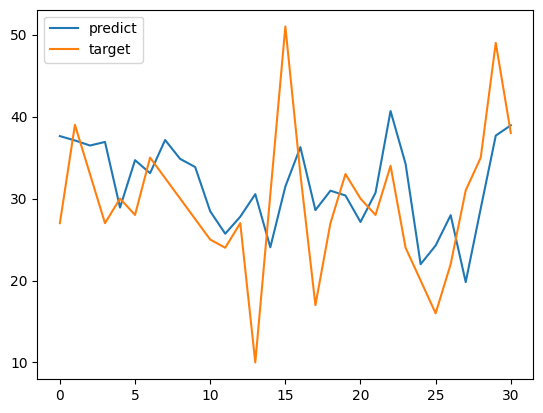

In [ ]:
plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:
MAPE(targetRealInterval[0], predictRealInterval[0] )

26.357143479489274

##o3

In [ ]:
modelo_O3 =  treinar_mlp(X_train_acf_o3, y_train_o3, X_val_acf_o3, y_val_o3, 4)


func:  tanh
func:  tanh
func:  tanh
func:  tanh
func:  logistic
func:  logistic
func:  logistic
func:  logistic
func:  tanh
func:  tanh
func:  logistic
func:  relu


In [ ]:
trainPredict_o3 = modelo_O3.predict(X_train_acf_o3)

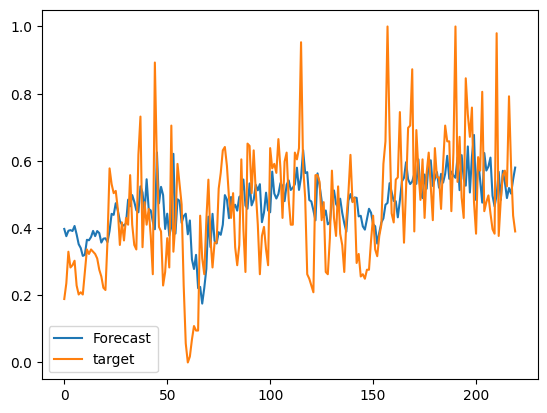

In [ ]:
plt.plot(trainPredict_o3, label='Forecast')
plt.plot(y_train_o3, label='target')
plt.legend()
plt.show()

In [ ]:
MSE(y_train_o3,trainPredict_o3 )

0.02378419666680267

In [ ]:
predictRealInterval = scaler_o3.inverse_transform(trainPredict_o3.reshape(1, -1))

In [ ]:
targetRealInterval =  scaler_o3 .inverse_transform(y_train_o3.reshape(1, -1) )

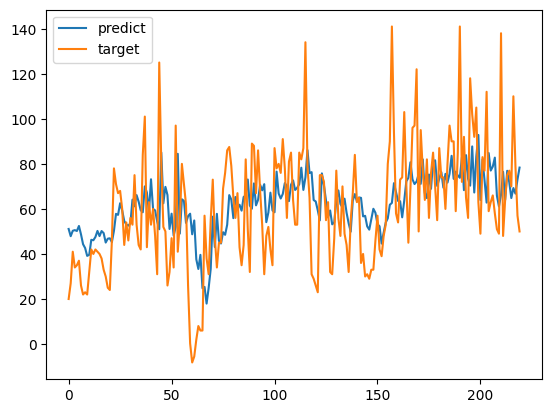

In [ ]:
plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:

def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true )) * 100

In [ ]:
MSE(targetRealInterval,predictRealInterval)

529.290771150762

In [ ]:
MAPE(targetRealInterval,predictRealInterval)

143.52950992504577

###o3_teste _mlp

In [ ]:
testPredict_o3 = modelo_O3.predict(X_test_acf_o3)

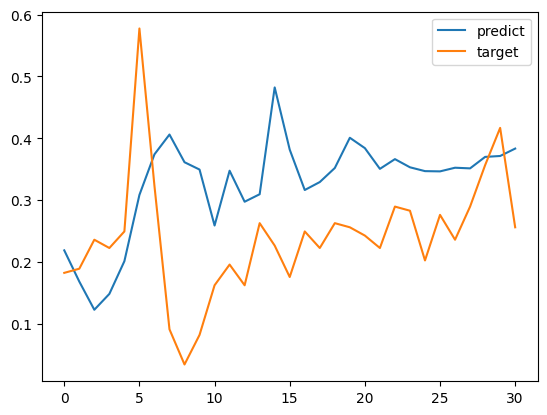

In [ ]:
plt.plot(testPredict_o3, label = 'predict')
plt.plot(y_test_o3, label= 'target')
plt.legend()
plt.show()

In [ ]:

predictRealInterval = scaler_o3.inverse_transform(testPredict_o3.reshape(1, -1))

In [ ]:

targetRealInterval =  scaler_o3.inverse_transform(y_test_o3.reshape(1, -1) )

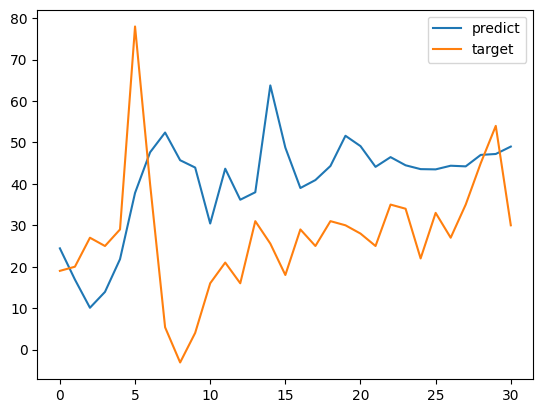

In [ ]:

plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:
MAPE(targetRealInterval[0], predictRealInterval[0] )

163.75928447039246

##co

In [ ]:
modelo_CO =  treinar_mlp(X_train_acf_co, y_train_co, X_val_acf_co, y_val_co, 4)

func:  tanh
func:  tanh
func:  tanh
func:  tanh
func:  logistic
func:  logistic
func:  tanh


In [ ]:
trainPredict_co = modelo_CO.predict(X_train_acf_co)

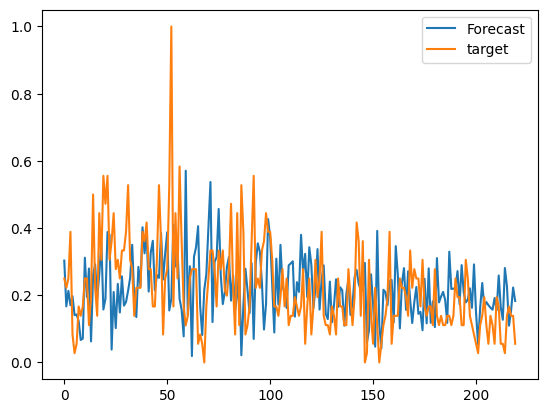

In [ ]:
plt.plot(trainPredict_co, label='Forecast')
plt.plot(y_train_co, label='target')
plt.legend()
plt.show()

In [ ]:

MSE(y_train_co,trainPredict_co )

0.024543045929759148

In [ ]:

predictRealInterval = scaler_co.inverse_transform(trainPredict_co.reshape(1, -1))
targetRealInterval =  scaler_co.inverse_transform(y_train_co.reshape(1, -1) )


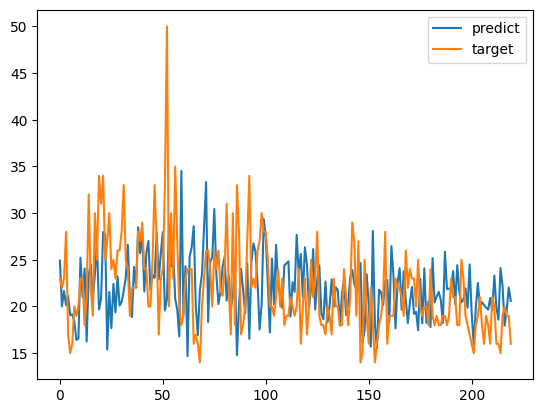

In [ ]:

plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:


def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true )) * 100


In [ ]:

MSE(targetRealInterval,predictRealInterval)

31.807787524967864

In [ ]:
MAPE(targetRealInterval,predictRealInterval)

19.237554073278254

###teste Co

In [ ]:
testPredict_co = modelo_CO.predict(X_test_acf_co)

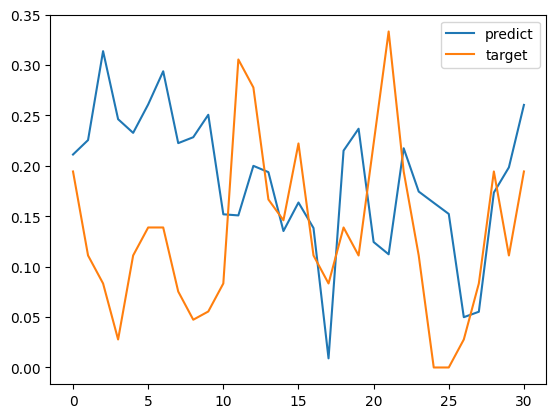

In [ ]:
plt.plot(testPredict_co, label = 'predict')
plt.plot(y_test_co, label= 'target')
plt.legend()
plt.show()

In [ ]:

predictRealInterval = scaler_co.inverse_transform(testPredict_co.reshape(1, -1))


In [ ]:

targetRealInterval =  scaler_co.inverse_transform(y_test_co.reshape(1, -1) )

In [ ]:
MAPE(targetRealInterval[0], predictRealInterval[0] )

20.474823781663844

##no2

In [ ]:
modelo_NO2 =  treinar_mlp(X_train_acf_no2, y_train_no2, X_val_acf_no2, y_val_no2, 4)

func:  tanh
func:  tanh
func:  tanh
func:  tanh
func:  tanh
func:  logistic
func:  logistic
func:  logistic
func:  tanh
func:  logistic
func:  tanh
func:  tanh
func:  logistic
func:  logistic
func:  logistic


In [ ]:
trainPredict_no2 = modelo_NO2 .predict(X_train_acf_no2)

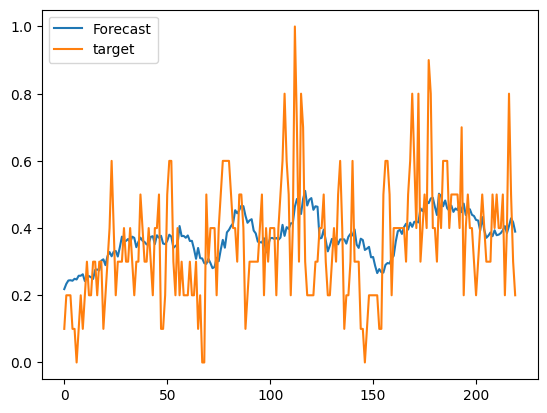

In [ ]:
plt.plot(trainPredict_no2, label='Forecast')
plt.plot(y_train_no2, label='target')
plt.legend()
plt.show()

In [ ]:
MSE(y_train_no2,trainPredict_no2)

0.02559528724838033

In [ ]:
predictRealInterval = scaler_no2.inverse_transform(trainPredict_no2.reshape(1, -1))
targetRealInterval =  scaler_no2.inverse_transform(y_train_no2.reshape(1, -1) )

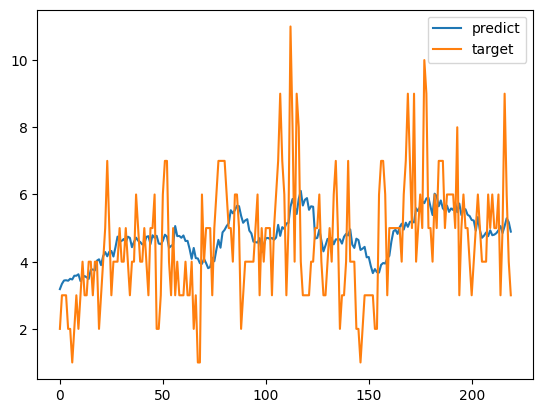

In [ ]:

plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true )) * 100

In [ ]:
MSE(targetRealInterval,predictRealInterval)

2.5595287248380325

In [ ]:
MAPE(targetRealInterval,predictRealInterval)

36.15589502759275

###teste no2

In [ ]:
testPredict_no2 = modelo_NO2.predict(X_test_acf_no2)


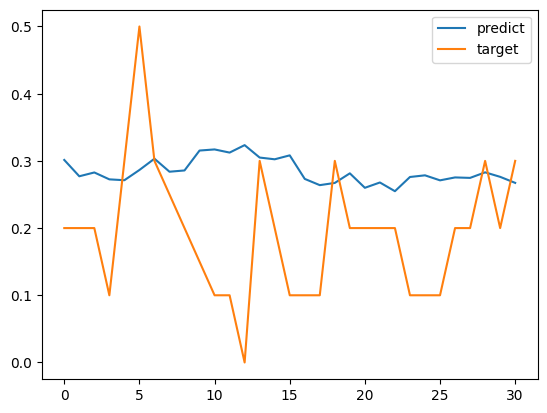

In [ ]:
plt.plot(testPredict_no2, label = 'predict')
plt.plot(y_test_no2, label= 'target')
plt.legend()
plt.show()

In [ ]:
predictRealInterval = scaler_no2.inverse_transform(testPredict_no2.reshape(1, -1))


In [ ]:

targetRealInterval =  scaler_no2.inverse_transform(y_test_no2.reshape(1, -1) )

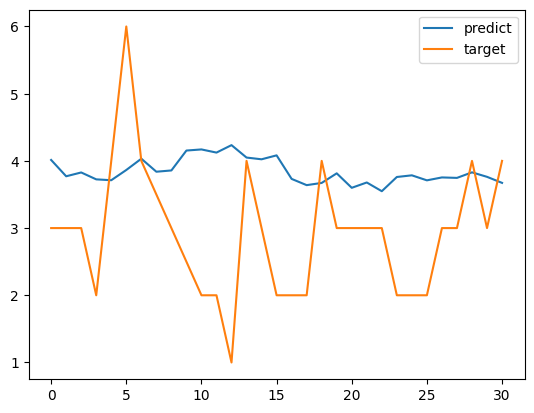

In [ ]:
plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:
MAPE(targetRealInterval[0], predictRealInterval[0] )

52.075585763144474

##so2

In [ ]:
modelo_SO2 =  treinar_mlp(X_train_acf_so2, y_train_so2, X_val_acf_so2, y_val_so2,4)


func:  tanh
func:  tanh
func:  tanh
func:  tanh
func:  tanh


In [ ]:
trainPredict_so2 = modelo_SO2 .predict(X_train_acf_so2)

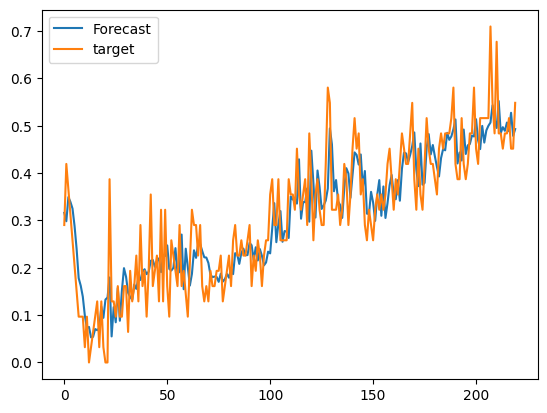

In [ ]:
plt.plot(trainPredict_so2, label='Forecast')
plt.plot(y_train_so2, label='target')
plt.legend()
plt.show()

In [ ]:
MSE(y_train_so2,trainPredict_so2 )

0.004506772484382994

In [ ]:

predictRealInterval = scaler_so2.inverse_transform(trainPredict_so2.reshape(1, -1))
targetRealInterval =  scaler_so2.inverse_transform(y_train_so2.reshape(1, -1) )


In [ ]:


def MAPE(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true )) * 100

In [ ]:


MSE(targetRealInterval,predictRealInterval)

4.331008357492057

In [ ]:
MAPE(targetRealInterval,predictRealInterval)

15.766906496332615

###teste so2

In [ ]:
testPredict_so2= modelo_SO2.predict(X_test_acf_so2)

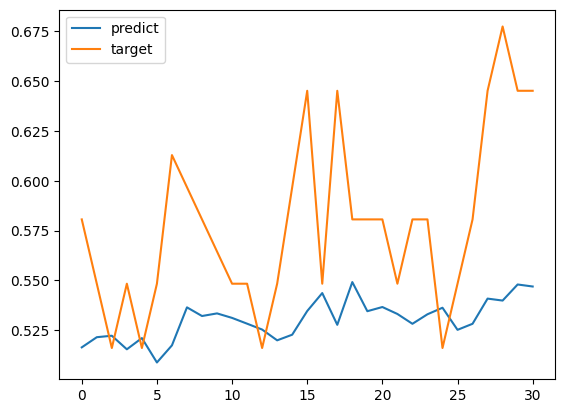

In [ ]:
plt.plot(testPredict_so2, label = 'predict')
plt.plot(y_test_so2, label= 'target')
plt.legend()
plt.show()

In [ ]:

predictRealInterval = scaler_so2.inverse_transform(testPredict_so2.reshape(1, -1))


In [ ]:

targetRealInterval =  scaler_so2.inverse_transform(y_test_so2.reshape(1, -1) )

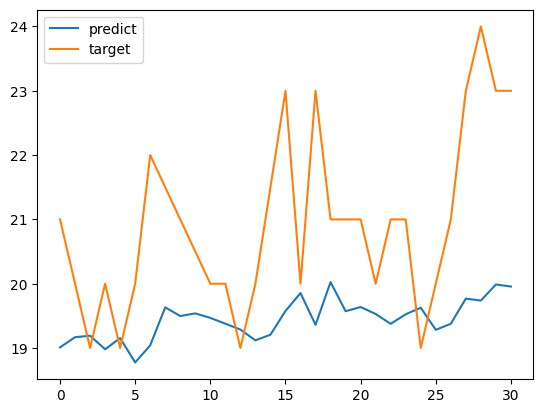

In [ ]:
plt.plot(predictRealInterval[0], label = 'predict')
plt.plot(targetRealInterval[0], label= 'target')
plt.legend()
plt.show()

In [ ]:
MAPE(targetRealInterval[0], predictRealInterval[0] )

7.168705772521012

In [ ]:
#correção de tipos do conjunto= feito
#retirada de colunas não pertinentes = feito
#seleção de apenas uma area do territorio pra ser investigada= feito
#transformação do datatime = feito
#retirada de duplicadas = feito
#index datatime = feito
#heatmap - coorelaçao = feito
#acf  = nao realizado
#interpolar primeiro = feito
# diferenciação para variavel time so2 que nao é estacionaria = nao feito
#sepração teinamento e teste = feito

#fit APENAS NO TREINAMENTO = feito
#normalização =feito
#criação dos coorelogramas = feito
#criando create_sliding_windows  = fazer

#regresssão
#time janela - como se fosse dois meses ajudando a prever o proximo mes
#primeiro fazer o split do conju, para nao influenciar o conjunto de treinamento na media dele


#Bom dia!
#Não precisa realizar a diferenciação. Após criar o janelamento vc segue como um problema de regressão onde o x é a janela e o y é o respectivo targe


SyntaxError: invalid syntax (<ipython-input-18-61e69e2d5a2c>, line 4)